
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

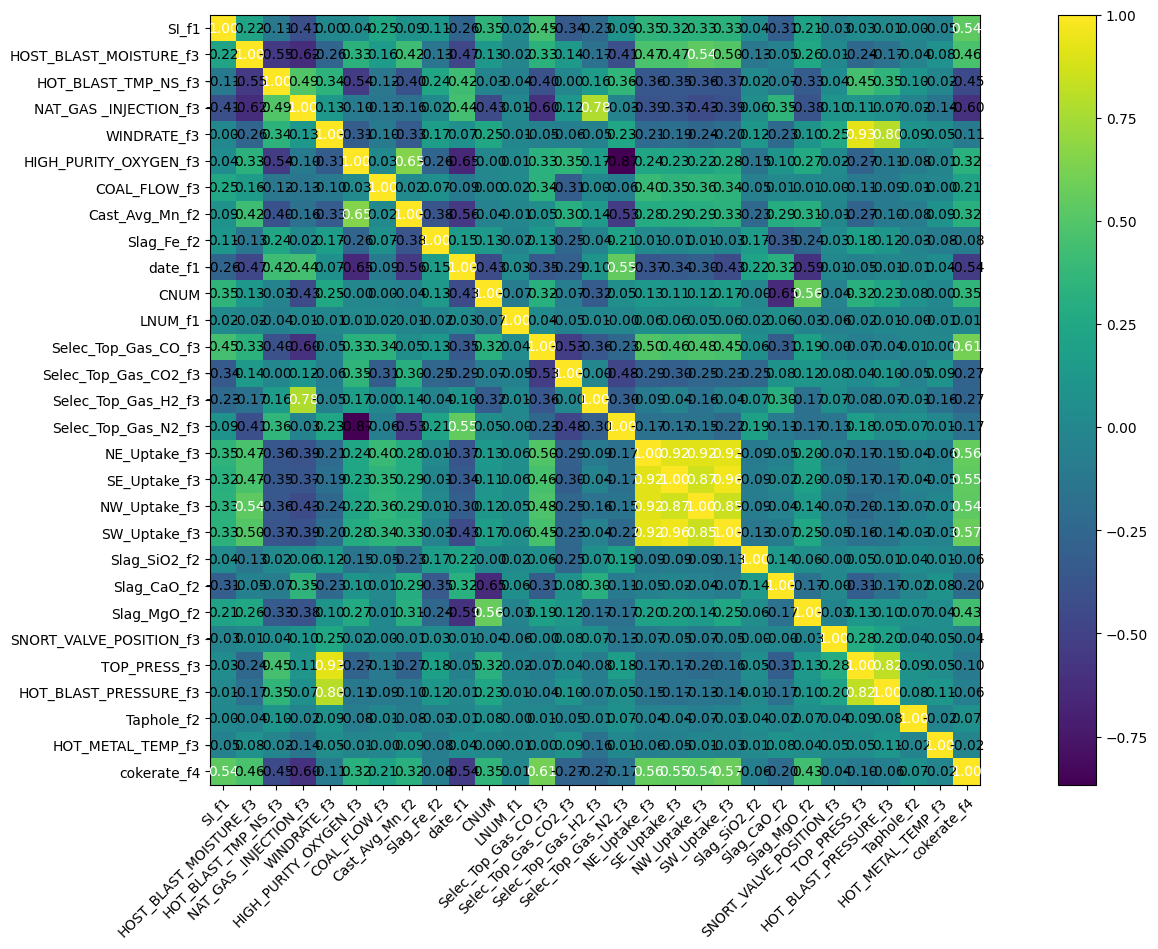

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

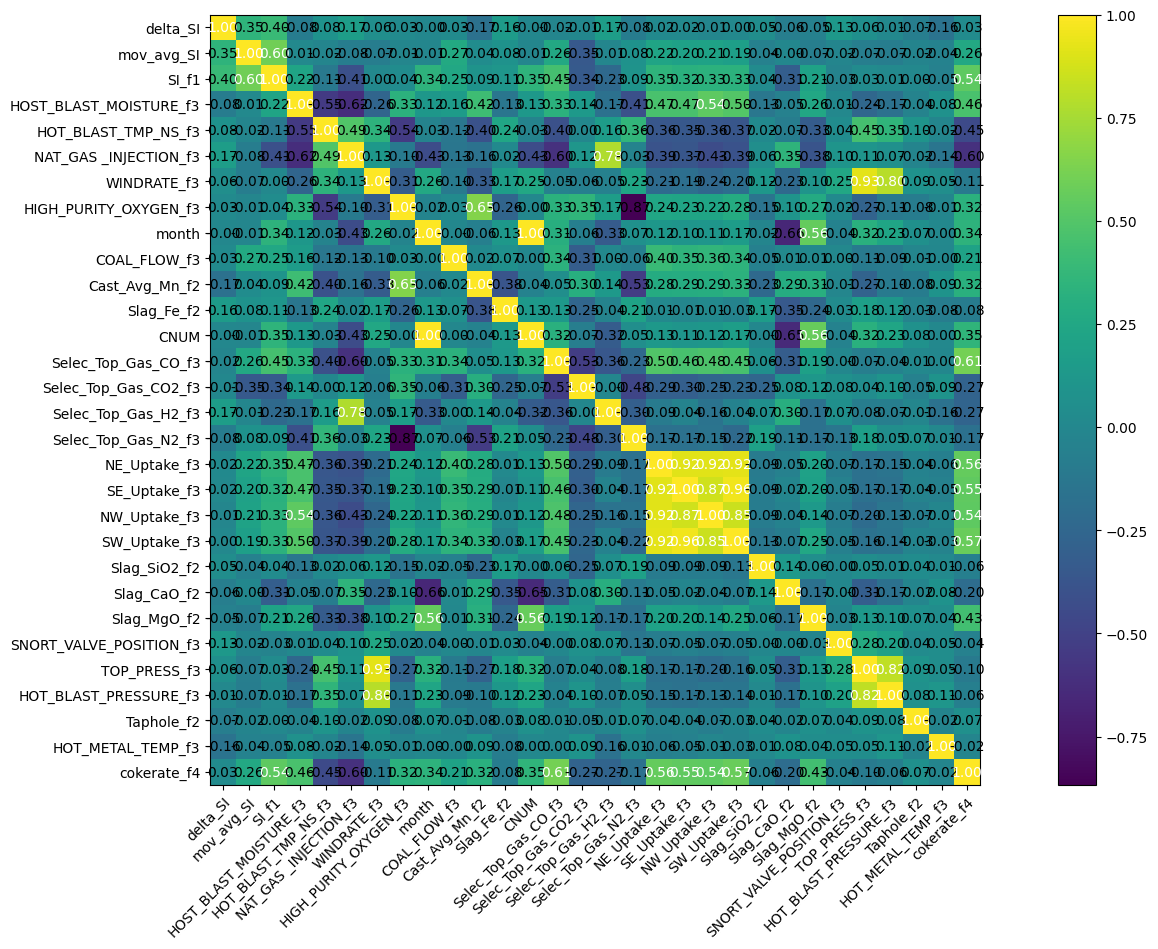

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## alpha = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        alpha = 0.9
        
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss  + 0.01 * smoothness_loss 

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.175836
Loss_SI: 1.4169983863830566 Loss_all: 1.223848819732666
===
[50] Train Loss: 0.354820
Loss_SI: 0.3813738524913788 Loss_all: 0.4095502495765686
===


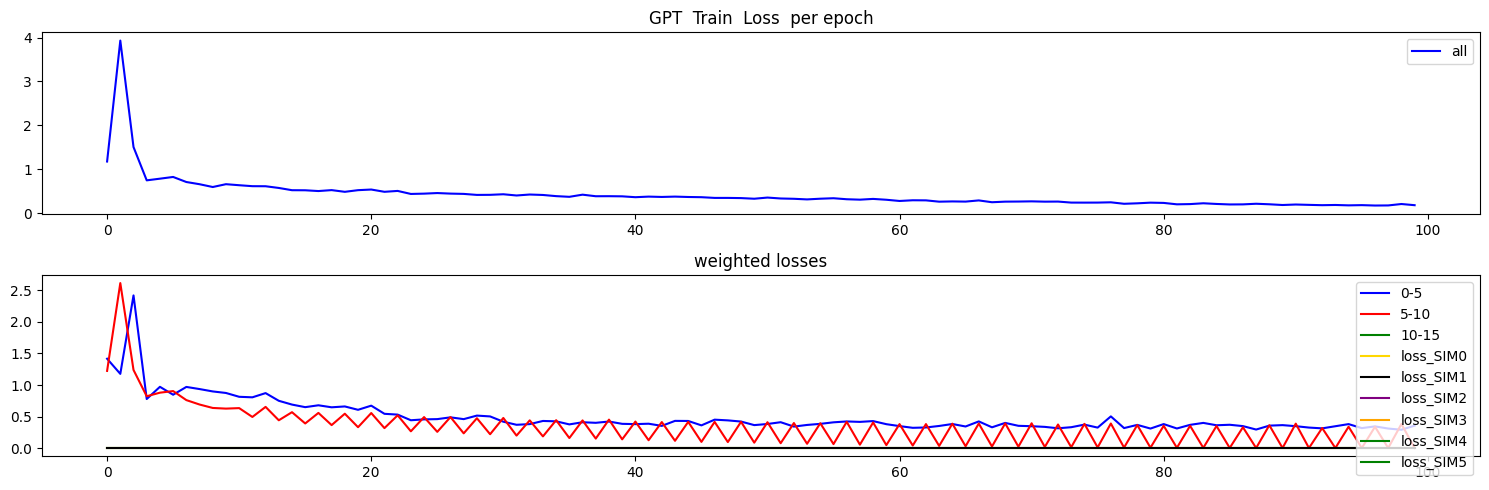

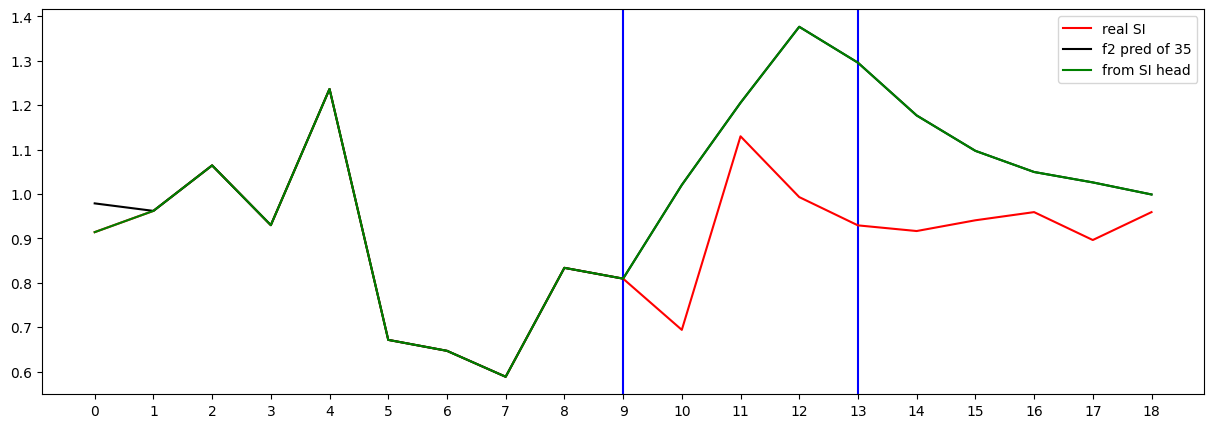

Testing R**2 - (all) - (no inputs):  0.8397845543659521
Testing R**2 - (f2) - SI full (no inputs):  -11.98780430062582
Testing R**2 - SI head only (no inputs):  -11.98780430062582
0 ...index R**2 (no inputs):  -0.309939480119392
1 ...index R**2 (no inputs):  -6.7825926217146675
2 ...index R**2 (no inputs):  -11.98780430062582
3 ...index R**2 (no inputs):  -146.07838206835072
4 ...index R**2 (no inputs):  -4747.446661690445
5 ...index R**2 (no inputs):  -182.23856144714276
6 ...index R**2 (no inputs):  -2.3351121277697318
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.012357086457846611
10 ...index R**2 (no inputs):  0.42993723312901344
11 ...index R**2 (no inputs):  -136.5955360533262
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.557878730364453
16 ...index R**2 (no inputs):  -3.7874422671692924
17 ...index R**2 (no inputs):  -77.447819663030

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.219226
Loss_SI: 1.07608163356781 Loss_all: 1.2320915460586548
===
[50] Train Loss: 0.456182
Loss_SI: 0.4798696041107178 Loss_all: 0.4687275290489197
===


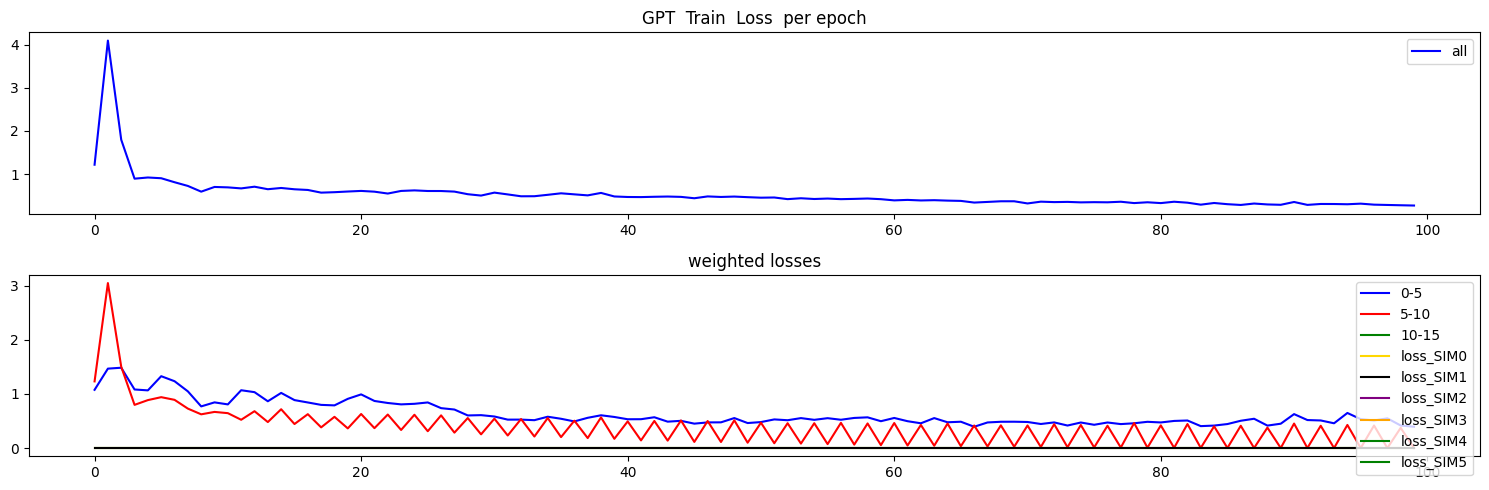

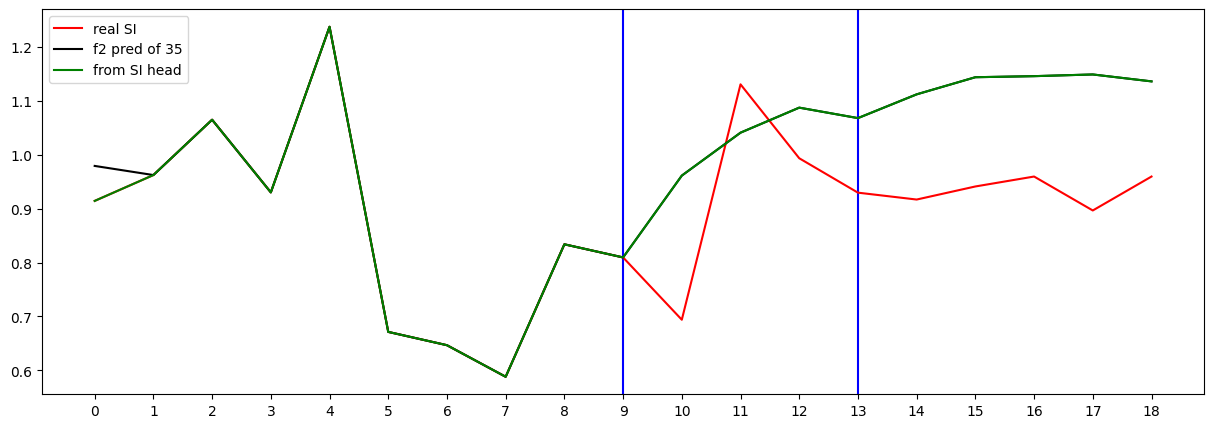

Testing R**2 - (all) - (no inputs):  0.8467779863190612
Testing R**2 - (f2) - SI full (no inputs):  -6.319439930628281
Testing R**2 - SI head only (no inputs):  -6.319439930628281
0 ...index R**2 (no inputs):  0.29328174563041687
1 ...index R**2 (no inputs):  -0.5587816772799765
2 ...index R**2 (no inputs):  -6.319439930628281
3 ...index R**2 (no inputs):  -183.3982810378452
4 ...index R**2 (no inputs):  -6744.60132073893
5 ...index R**2 (no inputs):  -174.201491428655
6 ...index R**2 (no inputs):  -3.9429165062240488
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.10753176474417836
10 ...index R**2 (no inputs):  -0.18606773315801362
11 ...index R**2 (no inputs):  -8.899321896511813
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.6414843427782073
16 ...index R**2 (no inputs):  -6.745509944169663
17 ...index R**2 (no inputs):  -39.52222983575509


In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.206166
Loss_SI: 1.1037123203277588 Loss_all: 1.1715471744537354
===
[50] Train Loss: 0.450103
Loss_SI: 0.5585779547691345 Loss_all: 0.48533323407173157
===


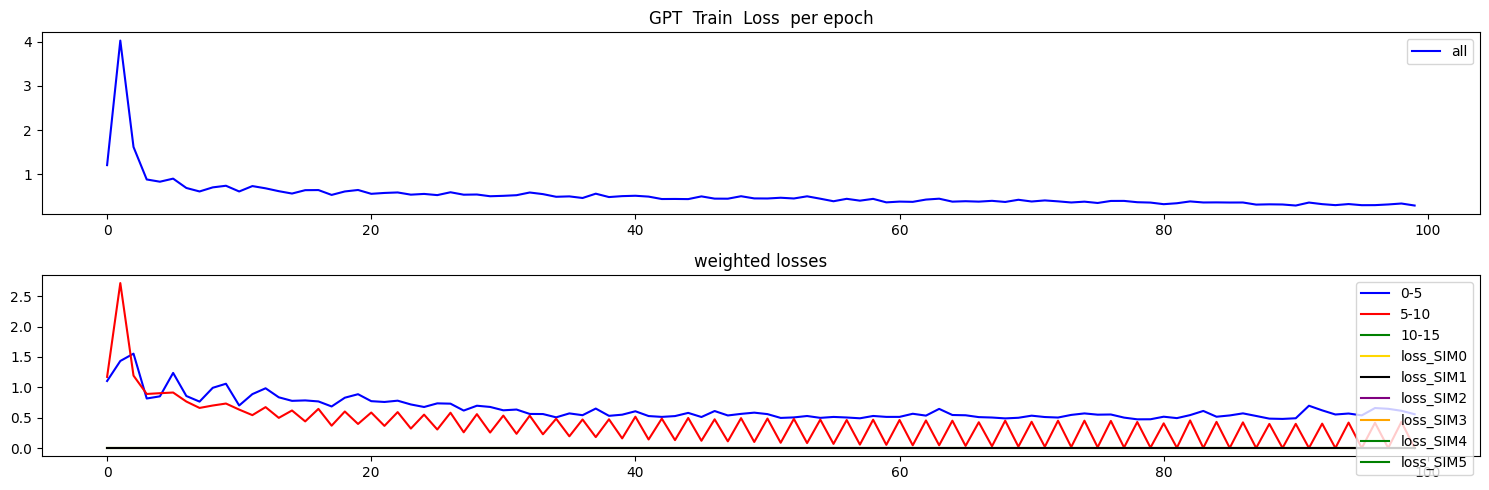

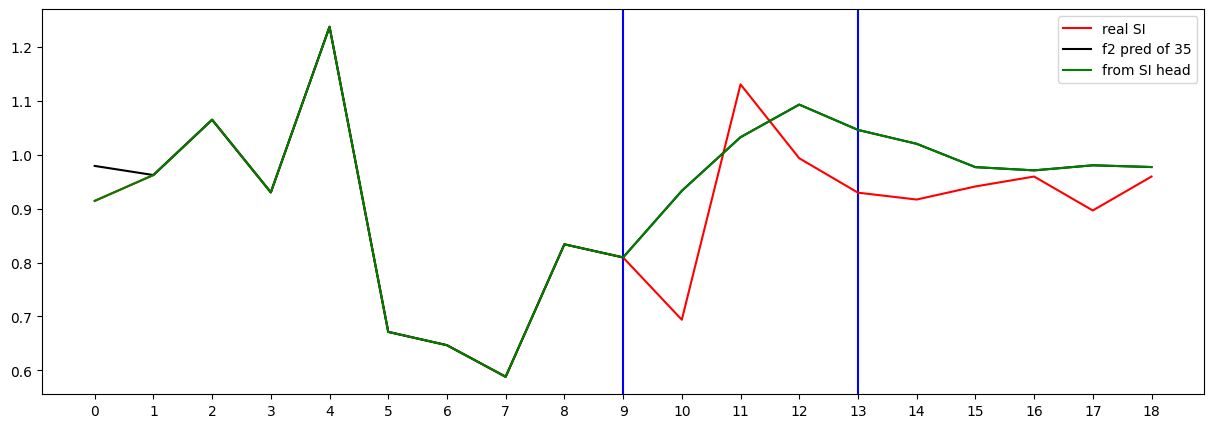

Testing R**2 - (all) - (no inputs):  0.8480129893154489
Testing R**2 - (f2) - SI full (no inputs):  -1.544644428280321
Testing R**2 - SI head only (no inputs):  -1.544644428280321
0 ...index R**2 (no inputs):  0.1729003817448247
1 ...index R**2 (no inputs):  -1.1965588417272452
2 ...index R**2 (no inputs):  -1.544644428280321
3 ...index R**2 (no inputs):  -221.38617031298554
4 ...index R**2 (no inputs):  -6542.337543683871
5 ...index R**2 (no inputs):  -172.684126826224
6 ...index R**2 (no inputs):  -3.5483969128492268
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12993414441925477
10 ...index R**2 (no inputs):  -0.392411177383694
11 ...index R**2 (no inputs):  -36.43246050818254
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1390779016763144
16 ...index R**2 (no inputs):  -3.908803607775842
17 ...index R**2 (no inputs):  -109.88253767662646

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.341238
Loss_SI: 1.2875455617904663 Loss_all: 1.2106587886810303
===
[50] Train Loss: 0.503995
Loss_SI: 0.6725438833236694 Loss_all: 0.5374590754508972
===


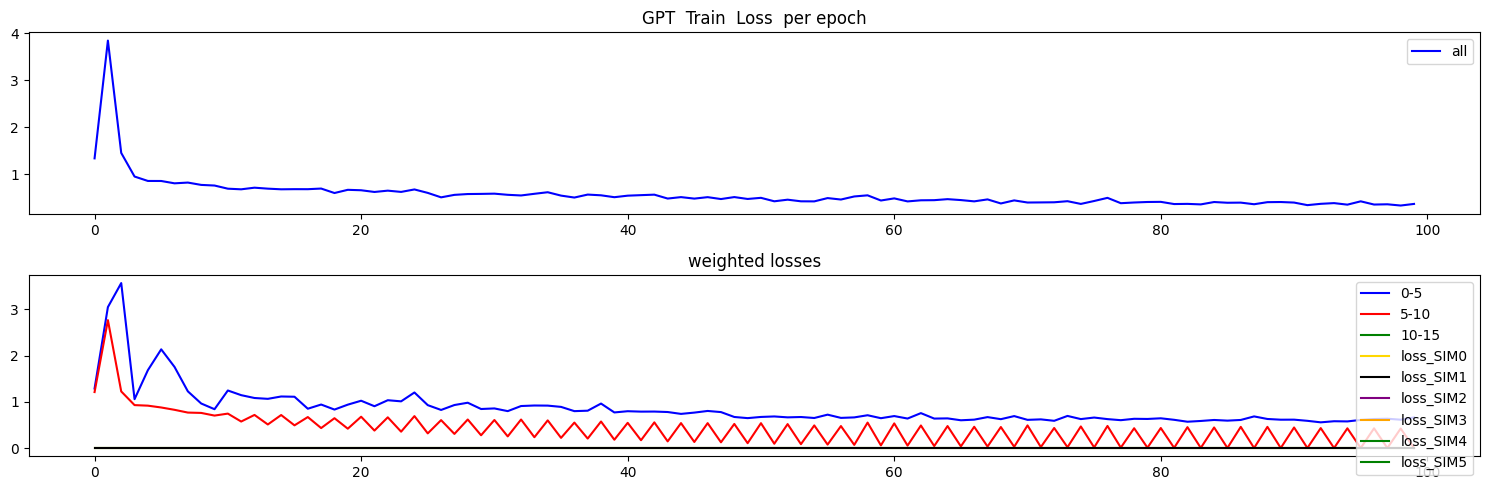

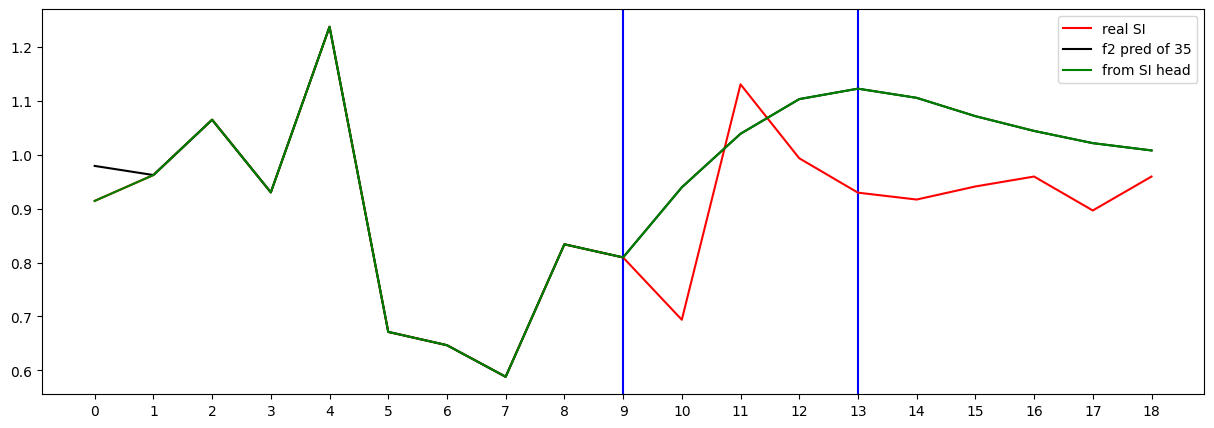

Testing R**2 - (all) - (no inputs):  0.8883897123443469
Testing R**2 - (f2) - SI full (no inputs):  -3.686528192231205
Testing R**2 - SI head only (no inputs):  -3.686528192231205
0 ...index R**2 (no inputs):  0.19682052188214916
1 ...index R**2 (no inputs):  -1.0383452630882113
2 ...index R**2 (no inputs):  -3.686528192231205
3 ...index R**2 (no inputs):  -216.00468379223412
4 ...index R**2 (no inputs):  -6476.253582443636
5 ...index R**2 (no inputs):  -126.36309181911486
6 ...index R**2 (no inputs):  -3.226122324035015
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.142170840795953
10 ...index R**2 (no inputs):  -0.2223761479852735
11 ...index R**2 (no inputs):  -134.39095973718577
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.0692634263152031
16 ...index R**2 (no inputs):  -3.720760111292739
17 ...index R**2 (no inputs):  -91.95944267196336

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.206268
Loss_SI: 1.186011552810669 Loss_all: 1.18905508518219
===
[50] Train Loss: 0.341108
Loss_SI: 0.6000785827636719 Loss_all: 0.4957512617111206
===


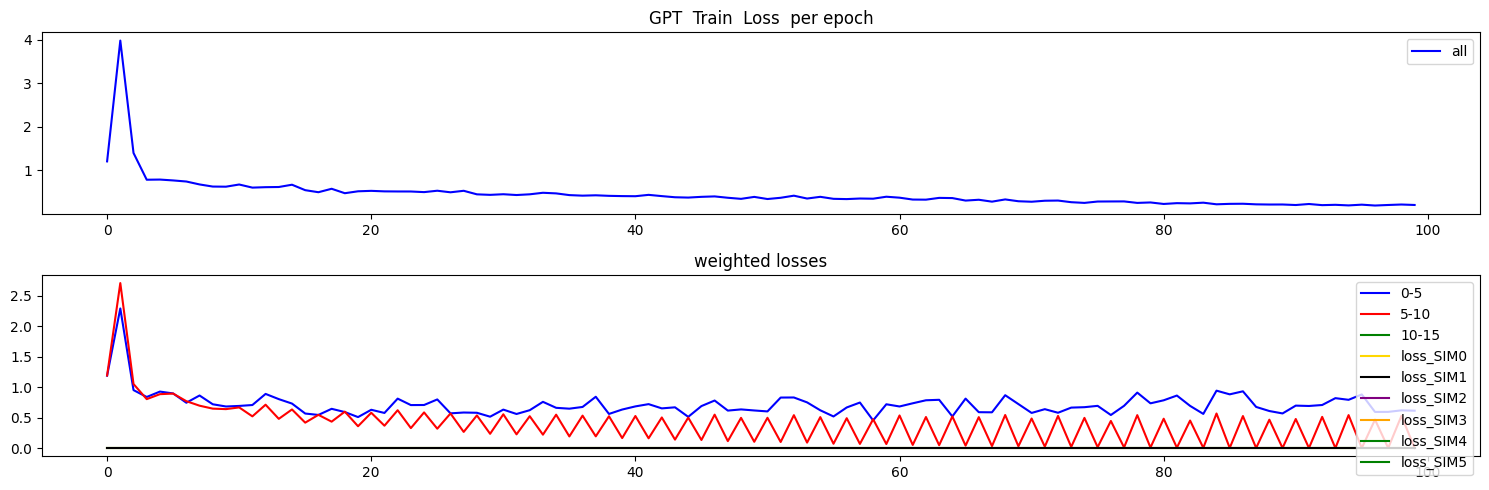

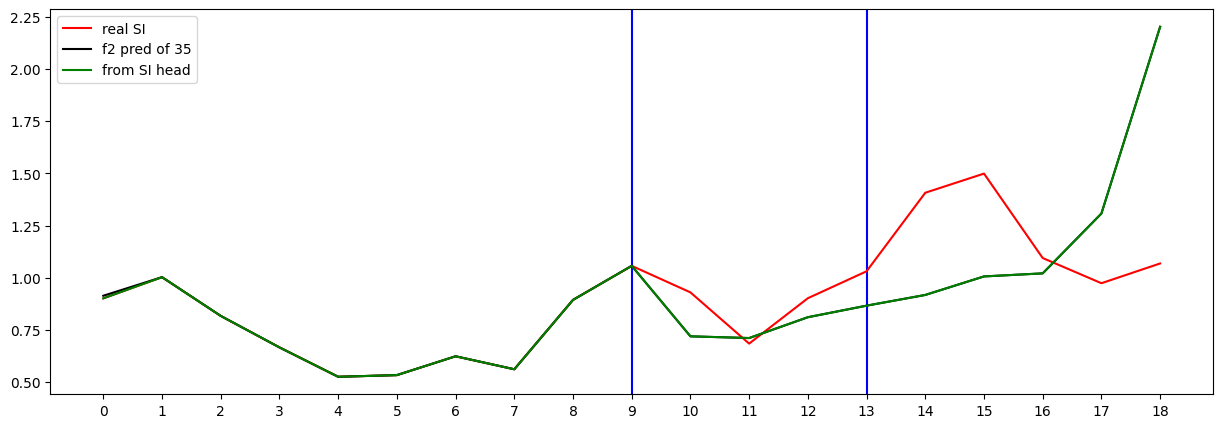

Testing R**2 - (all) - (no inputs):  0.7182406059590919
Testing R**2 - (f2) - SI full (no inputs):  -3.819244519994996
Testing R**2 - SI head only (no inputs):  -3.819244519994996
0 ...index R**2 (no inputs):  -1.557177468057548
1 ...index R**2 (no inputs):  -2.479080343465392
2 ...index R**2 (no inputs):  -3.819244519994996
3 ...index R**2 (no inputs):  -0.3178014339307813
4 ...index R**2 (no inputs):  -1.3169127994970418
5 ...index R**2 (no inputs):  -6.341523412823292
6 ...index R**2 (no inputs):  -1.200041357718027
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8926604601006245
10 ...index R**2 (no inputs):  -2.504779611917813
11 ...index R**2 (no inputs):  -242.00203022754087
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6115237225844172
16 ...index R**2 (no inputs):  -0.1709153196248001
17 ...index R**2 (no inputs):  -13.68439093645437

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.196026
Loss_SI: 1.2477511167526245 Loss_all: 1.1357057094573975
===
[50] Train Loss: 0.428093
Loss_SI: 0.795094907283783 Loss_all: 0.5463752746582031
===


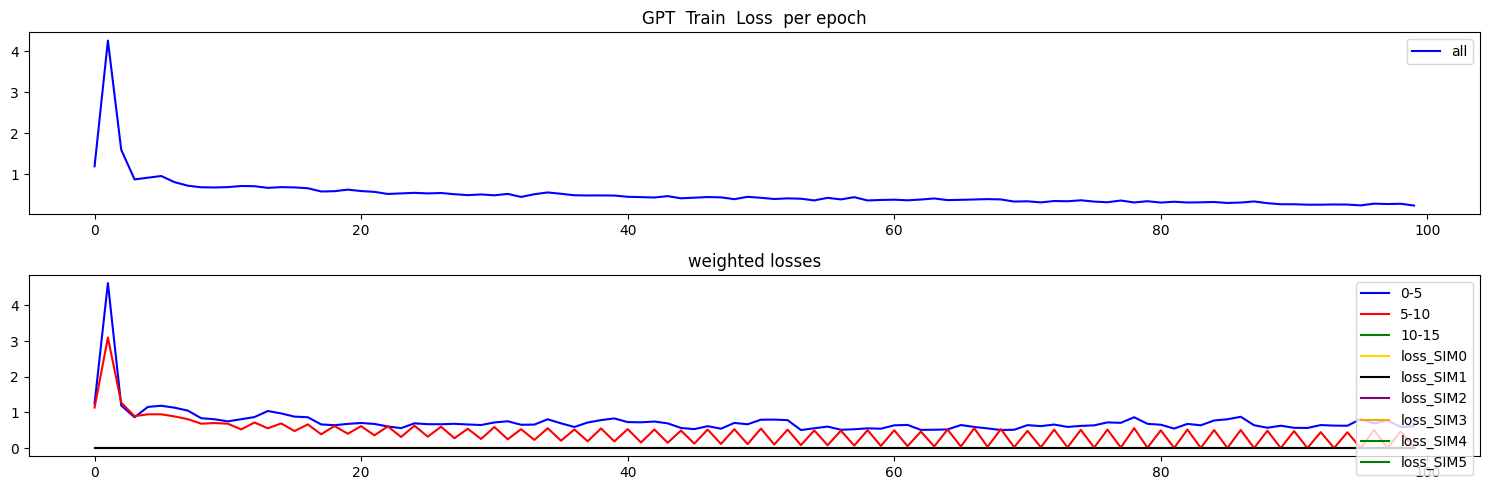

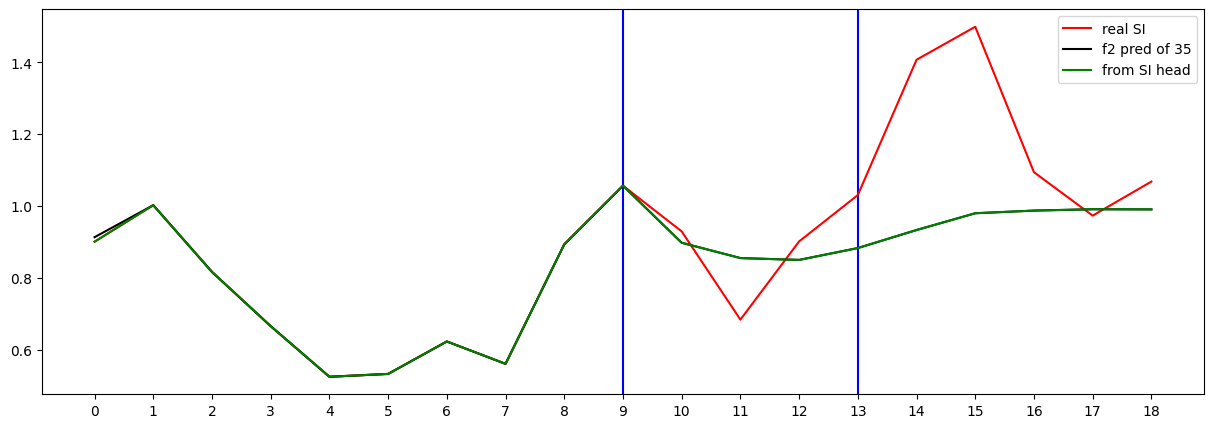

Testing R**2 - (all) - (no inputs):  0.5822163321502716
Testing R**2 - (f2) - SI full (no inputs):  -0.36462184247780693
Testing R**2 - SI head only (no inputs):  -0.36462184247780693
0 ...index R**2 (no inputs):  0.025676502774609422
1 ...index R**2 (no inputs):  -1.2320960849771794
2 ...index R**2 (no inputs):  -0.36462184247780693
3 ...index R**2 (no inputs):  -1.1767890420100677
4 ...index R**2 (no inputs):  -1.8354954934057655
5 ...index R**2 (no inputs):  -9.892963023284407
6 ...index R**2 (no inputs):  -1.5639174975970582
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3082506406010337
10 ...index R**2 (no inputs):  -0.060031653057228906
11 ...index R**2 (no inputs):  -10.066923742615254
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.19968767895999484
16 ...index R**2 (no inputs):  0.020590738365172667
17 ...index R**2 (no inputs):  -15

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.235085
Loss_SI: 1.1950466632843018 Loss_all: 1.261033535003662
===
[50] Train Loss: 0.470795
Loss_SI: 0.5479612350463867 Loss_all: 0.536711573600769
===


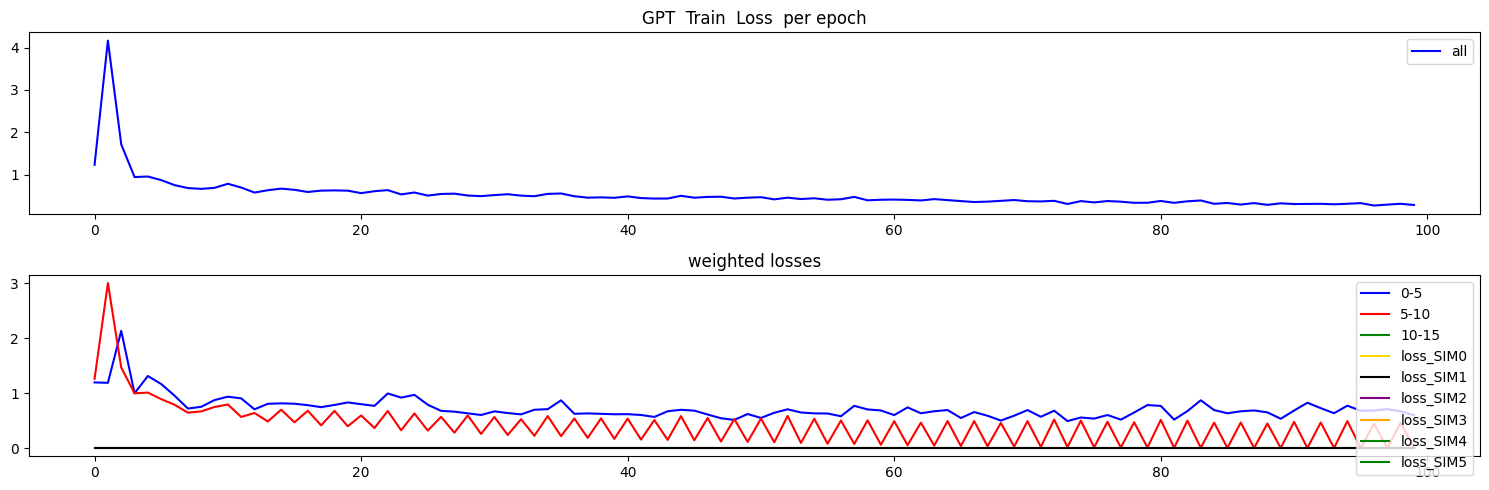

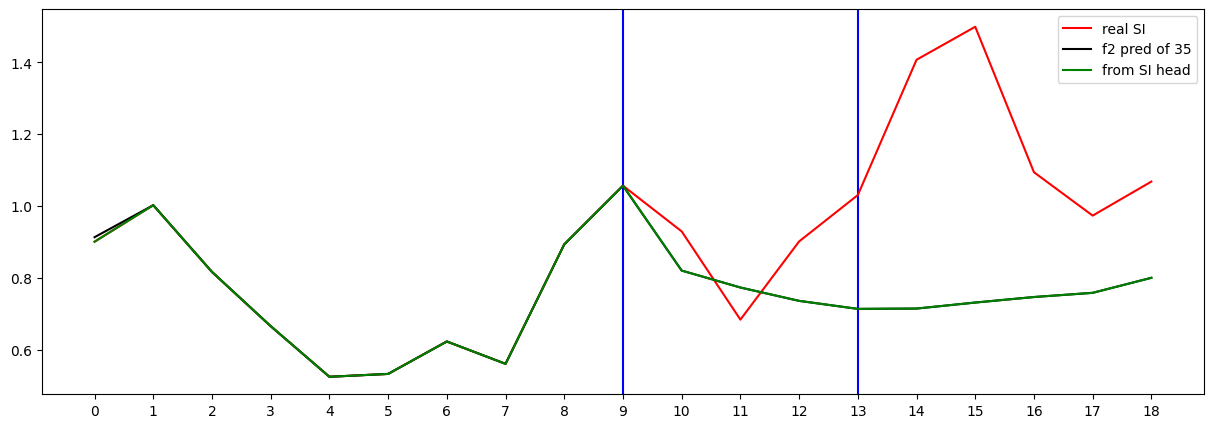

Testing R**2 - (all) - (no inputs):  0.8026839426930892
Testing R**2 - (f2) - SI full (no inputs):  -1.9270278954947995
Testing R**2 - SI head only (no inputs):  -1.9270278954947995
0 ...index R**2 (no inputs):  0.03564680926520658
1 ...index R**2 (no inputs):  -4.0535273096789455
2 ...index R**2 (no inputs):  -1.9270278954947995
3 ...index R**2 (no inputs):  -1.182504351088093
4 ...index R**2 (no inputs):  -1.046245291592066
5 ...index R**2 (no inputs):  -4.138687651283818
6 ...index R**2 (no inputs):  -1.1840811360777677
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8179259440299043
10 ...index R**2 (no inputs):  -1.7684919779751538
11 ...index R**2 (no inputs):  -31.501364674408997
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.0042471778960613
16 ...index R**2 (no inputs):  -0.1220950278764199
17 ...index R**2 (no inputs):  -64.968841376

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.138040
Loss_SI: 1.0689281225204468 Loss_all: 1.1693017482757568
===
[50] Train Loss: 0.453712
Loss_SI: 0.7017002105712891 Loss_all: 0.5095757246017456
===


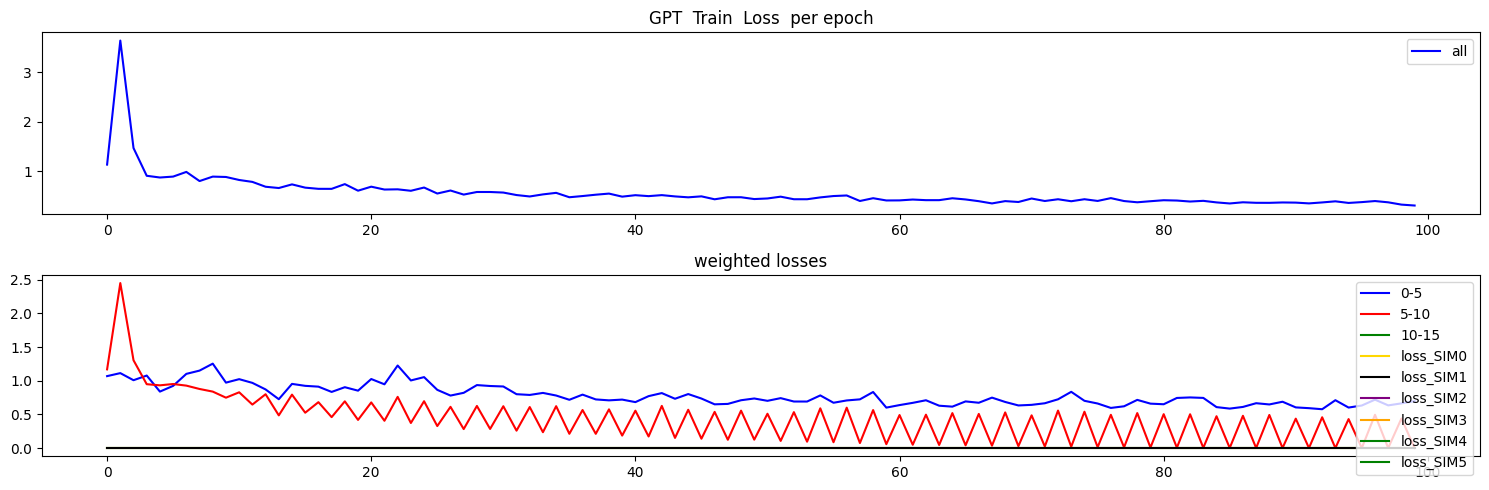

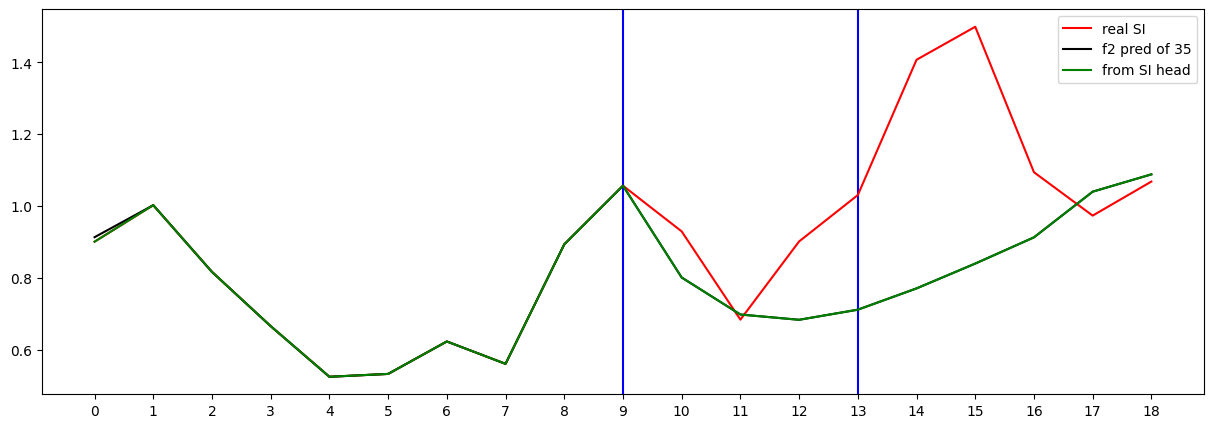

Testing R**2 - (all) - (no inputs):  0.7495587426939572
Testing R**2 - (f2) - SI full (no inputs):  -1.5138417833225946
Testing R**2 - SI head only (no inputs):  -1.5138417833225946
0 ...index R**2 (no inputs):  -0.3596236459112918
1 ...index R**2 (no inputs):  -1.4536493937793558
2 ...index R**2 (no inputs):  -1.5138417833225946
3 ...index R**2 (no inputs):  -2.5433044014937742
4 ...index R**2 (no inputs):  -1.8172755059887429
5 ...index R**2 (no inputs):  -5.529814524111441
6 ...index R**2 (no inputs):  -1.2697991627847465
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.9248707251834993
10 ...index R**2 (no inputs):  -0.5140044225152147
11 ...index R**2 (no inputs):  -21.896673722515608
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8363664291611772
16 ...index R**2 (no inputs):  -0.2693706694880127
17 ...index R**2 (no inputs):  -16.9991851

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.158653
Loss_SI: 1.2205243110656738 Loss_all: 1.2016419172286987
===
[50] Train Loss: 0.335746
Loss_SI: 0.458378404378891 Loss_all: 0.4390318989753723
===


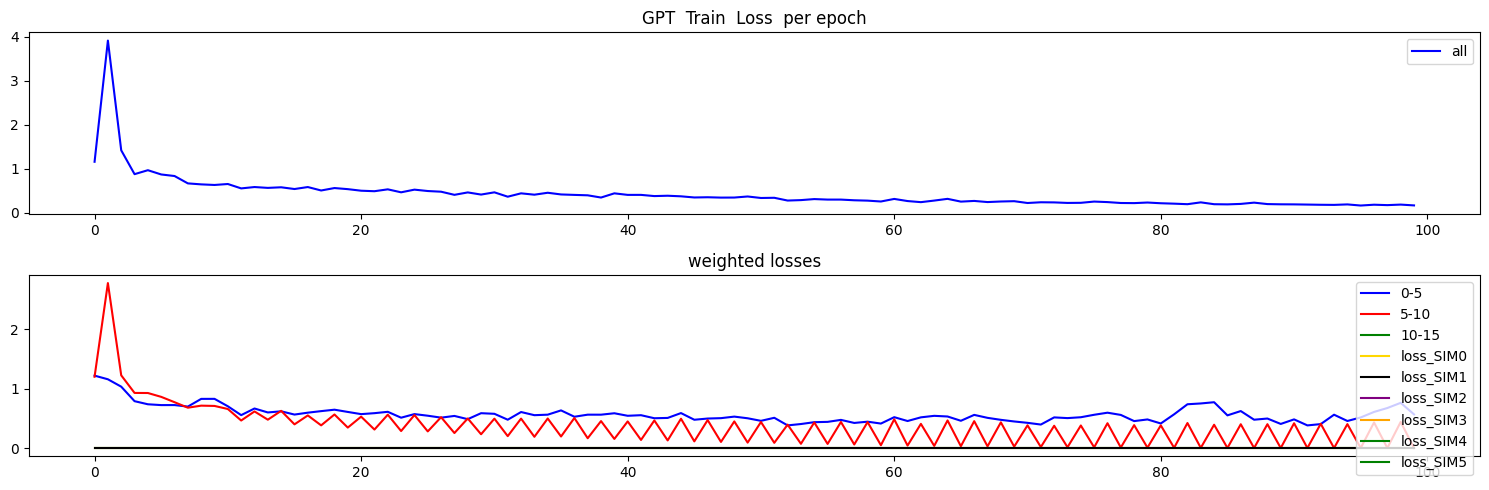

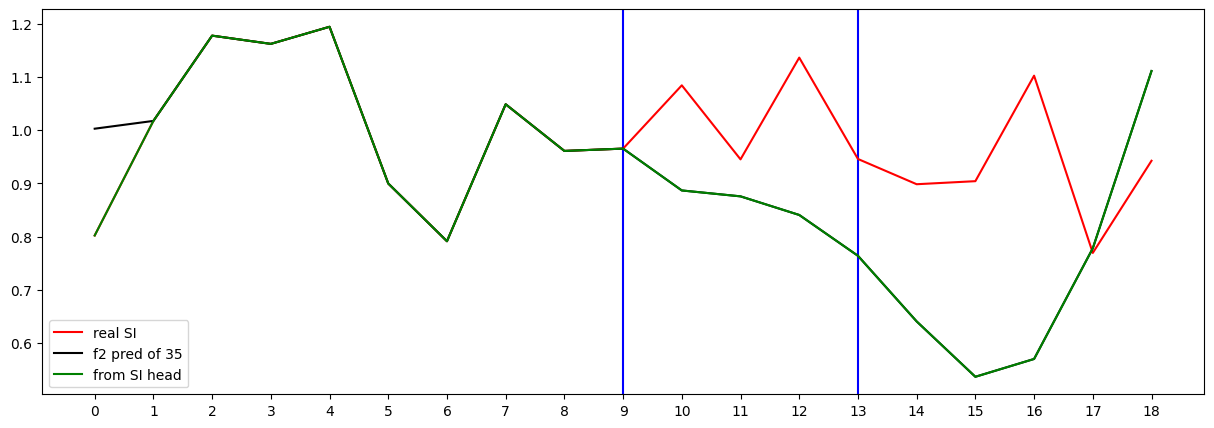

Testing R**2 - (all) - (no inputs):  0.9224791826772957
Testing R**2 - (f2) - SI full (no inputs):  -4.617382104539346
Testing R**2 - SI head only (no inputs):  -4.617382104539346
0 ...index R**2 (no inputs):  -0.7202134450774607
1 ...index R**2 (no inputs):  -3.9369050970666404
2 ...index R**2 (no inputs):  -4.617382104539346
3 ...index R**2 (no inputs):  -6063.686151323339
4 ...index R**2 (no inputs):  -58.34794207194642
5 ...index R**2 (no inputs):  -31.42237508365745
6 ...index R**2 (no inputs):  -18.866467603980343
7 ...index R**2 (no inputs):  -3601.8477446521333
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.11397837462885685
10 ...index R**2 (no inputs):  -1.1722210132341853
11 ...index R**2 (no inputs):  -20.096269480450193
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.172951367834335
16 ...index R**2 (no inputs):  -221.28372693873473
17 ...index R**2 (no inputs):  

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.230873
Loss_SI: 1.2761541604995728 Loss_all: 1.2921510934829712
===
[50] Train Loss: 0.356412
Loss_SI: 0.5281179547309875 Loss_all: 0.4421097934246063
===


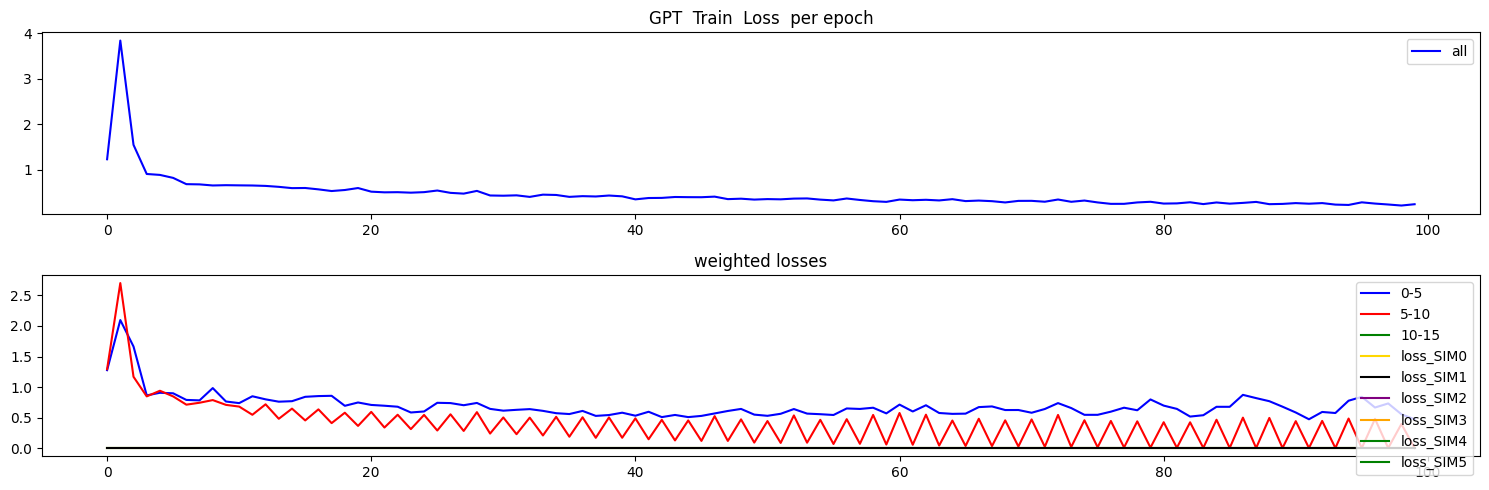

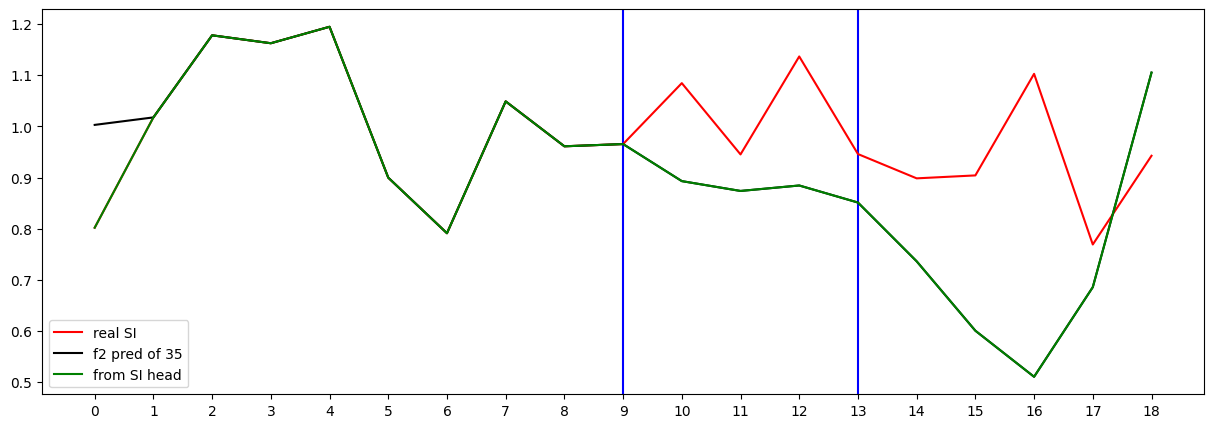

Testing R**2 - (all) - (no inputs):  0.875274253841374
Testing R**2 - (f2) - SI full (no inputs):  -4.004950266245963
Testing R**2 - SI head only (no inputs):  -4.004950266245963
0 ...index R**2 (no inputs):  -1.7158497753341737
1 ...index R**2 (no inputs):  -2.454941503873929
2 ...index R**2 (no inputs):  -4.004950266245963
3 ...index R**2 (no inputs):  -4680.626570810311
4 ...index R**2 (no inputs):  -28.808289477459194
5 ...index R**2 (no inputs):  -51.36240029164417
6 ...index R**2 (no inputs):  -106.99584830707943
7 ...index R**2 (no inputs):  -1905.0366462674374
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12955215845063073
10 ...index R**2 (no inputs):  -0.32970555022226167
11 ...index R**2 (no inputs):  -5.168663410980479
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.196559029891688
16 ...index R**2 (no inputs):  -257.0024848687818
17 ...index R**2 (no inputs):  -

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.428831
Loss_SI: 1.6032103300094604 Loss_all: 1.3714162111282349
===
[50] Train Loss: 0.462235
Loss_SI: 0.483965128660202 Loss_all: 0.45967623591423035
===


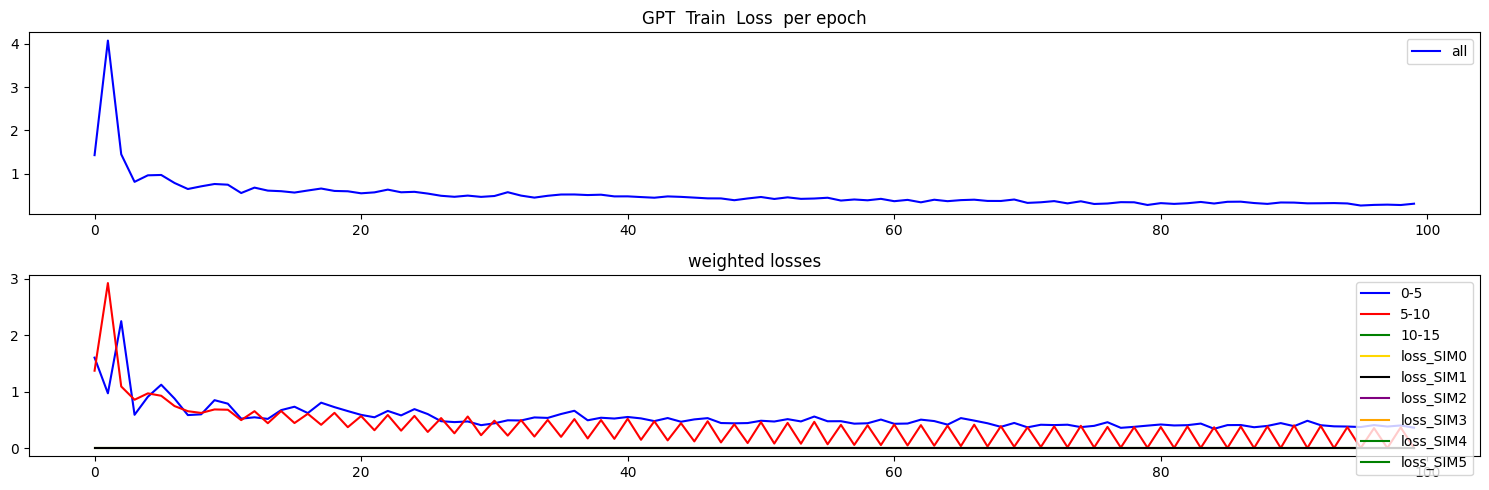

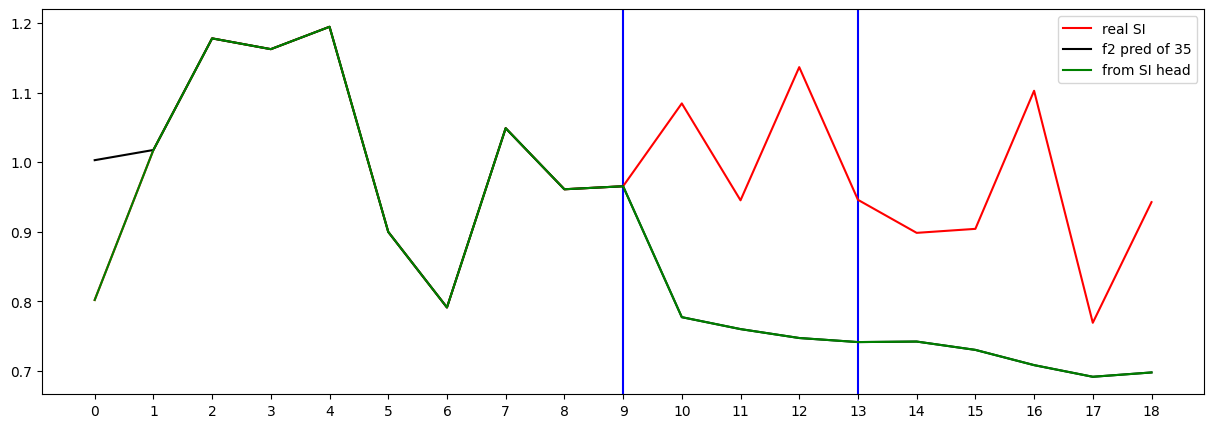

Testing R**2 - (all) - (no inputs):  0.9289830939144826
Testing R**2 - (f2) - SI full (no inputs):  -3.094138950039591
Testing R**2 - SI head only (no inputs):  -3.094138950039591
0 ...index R**2 (no inputs):  -0.30087980421072547
1 ...index R**2 (no inputs):  -0.27321245270866124
2 ...index R**2 (no inputs):  -3.094138950039591
3 ...index R**2 (no inputs):  -5577.987557541658
4 ...index R**2 (no inputs):  -926.9741723036295
5 ...index R**2 (no inputs):  -28.834677705565266
6 ...index R**2 (no inputs):  -153.95205219694998
7 ...index R**2 (no inputs):  -2872.742361378445
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.03994509014571701
10 ...index R**2 (no inputs):  0.03925458301658713
11 ...index R**2 (no inputs):  -518.7338269817733
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.311999177685927
16 ...index R**2 (no inputs):  -94.80671886632831
17 ...index R**2 (no inputs):  

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.455829
Loss_SI: 1.9139410257339478 Loss_all: 1.4604767560958862
===
[50] Train Loss: 0.383596
Loss_SI: 0.4188610017299652 Loss_all: 0.3801937699317932
===


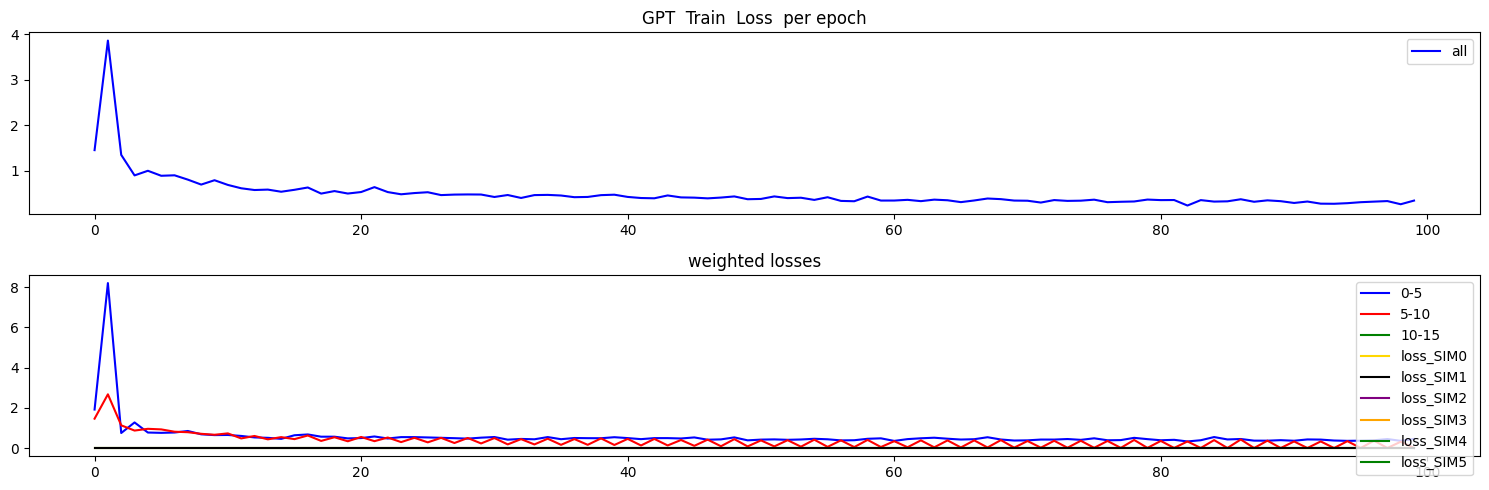

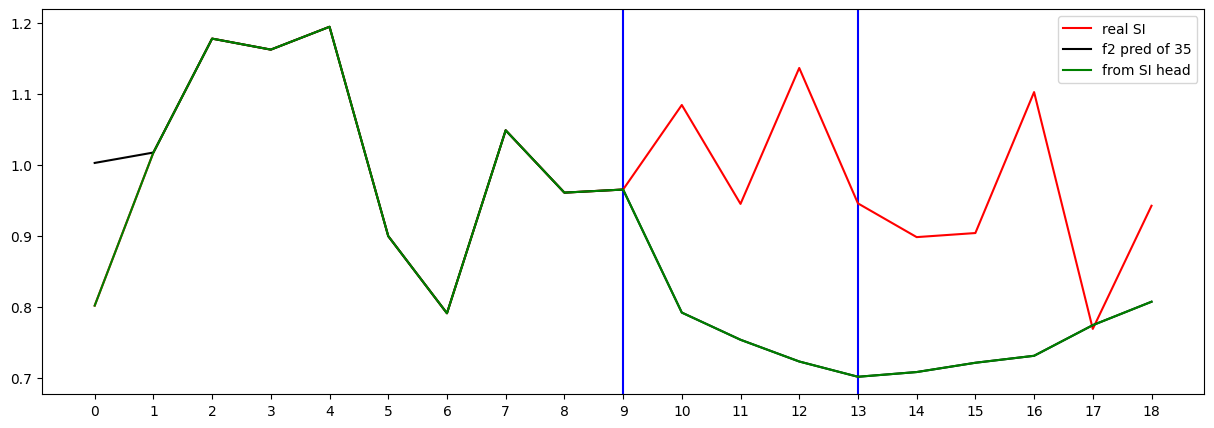

Testing R**2 - (all) - (no inputs):  0.8936820829373378
Testing R**2 - (f2) - SI full (no inputs):  -3.0502726123921065
Testing R**2 - SI head only (no inputs):  -3.0502726123921065
0 ...index R**2 (no inputs):  -0.16377658931316685
1 ...index R**2 (no inputs):  -1.0374514992939212
2 ...index R**2 (no inputs):  -3.0502726123921065
3 ...index R**2 (no inputs):  -3510.301092919932
4 ...index R**2 (no inputs):  -3065.683549456679
5 ...index R**2 (no inputs):  -43.22599380595105
6 ...index R**2 (no inputs):  -3376.7752053720737
7 ...index R**2 (no inputs):  -20199.314920305005
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.26975623325600195
10 ...index R**2 (no inputs):  0.05439700145708748
11 ...index R**2 (no inputs):  -22.617432759971
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6593887686789646
16 ...index R**2 (no inputs):  -25.49183454859095
17 ...index R**2 (no inputs): 

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.212854
Loss_SI: 1.1842570304870605 Loss_all: 1.1702880859375
===
[50] Train Loss: 0.370211
Loss_SI: 0.5853866934776306 Loss_all: 0.5222769379615784
===


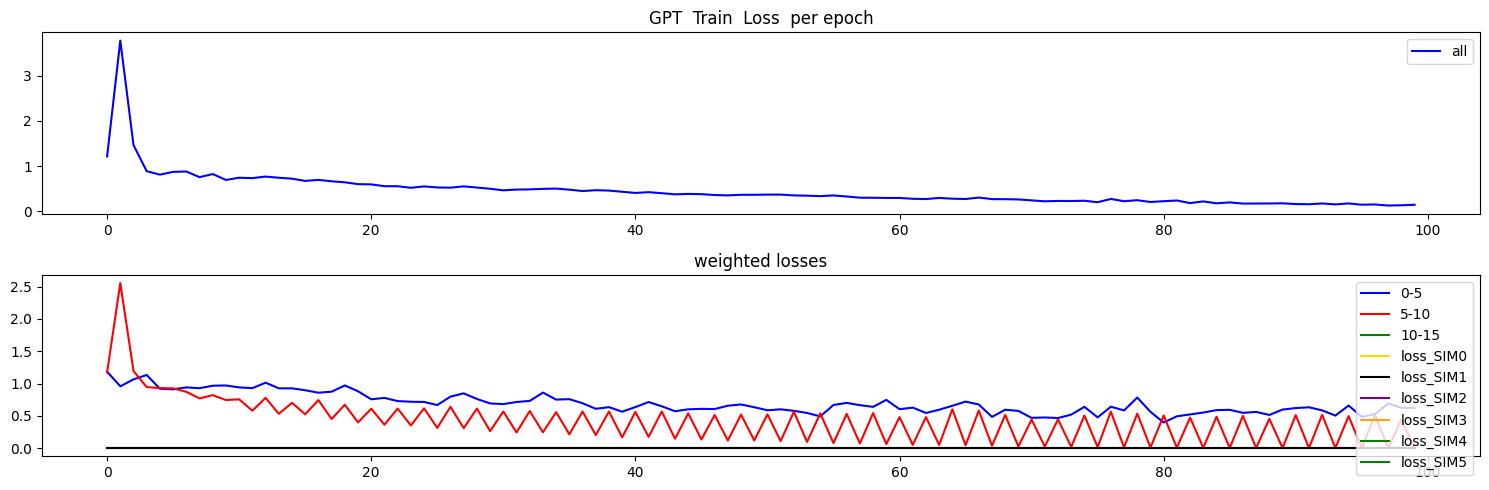

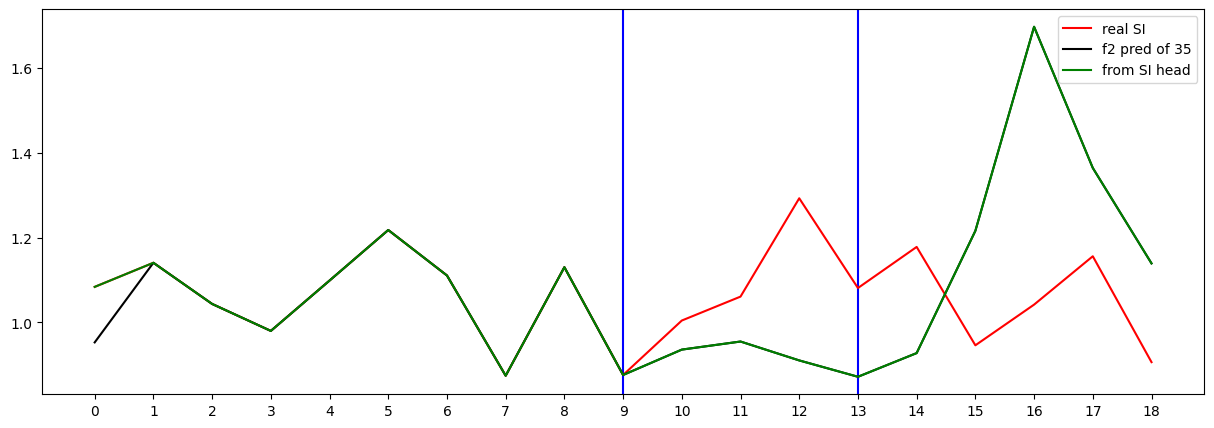

Testing R**2 - (all) - (no inputs):  0.9778560511675726
Testing R**2 - (f2) - SI full (no inputs):  -6.139202727465335
Testing R**2 - SI head only (no inputs):  -6.139202727465335
0 ...index R**2 (no inputs):  -0.7444297271873941
1 ...index R**2 (no inputs):  -2.063514202583947
2 ...index R**2 (no inputs):  -6.139202727465335
3 ...index R**2 (no inputs):  -1.5390639256013503
4 ...index R**2 (no inputs):  -251.06584162798185
5 ...index R**2 (no inputs):  -2.744027371008405
6 ...index R**2 (no inputs):  -48.59573957133338
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -5.268340901219546
10 ...index R**2 (no inputs):  -2.6099249590923193
11 ...index R**2 (no inputs):  -32.869711069311364
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7940360845578303
16 ...index R**2 (no inputs):  -2.5454711991909424
17 ...index R**2 (no inputs):  -21.5604990825042

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.231597
Loss_SI: 1.3076149225234985 Loss_all: 1.2530770301818848
===
[50] Train Loss: 0.496123
Loss_SI: 0.8571245074272156 Loss_all: 0.7127875685691833
===


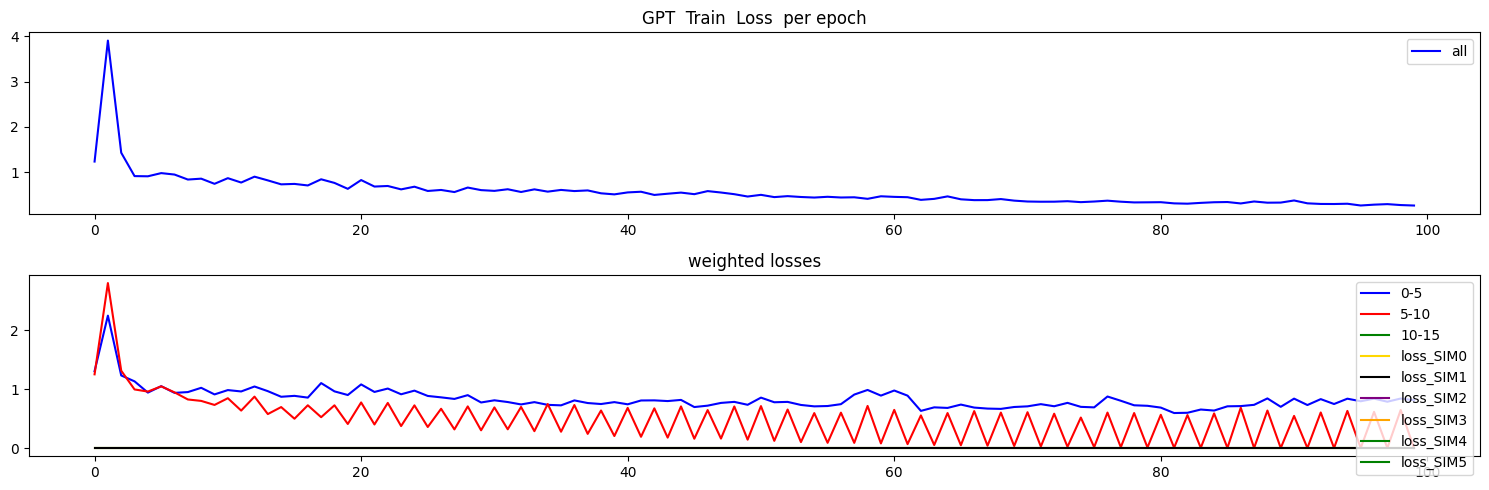

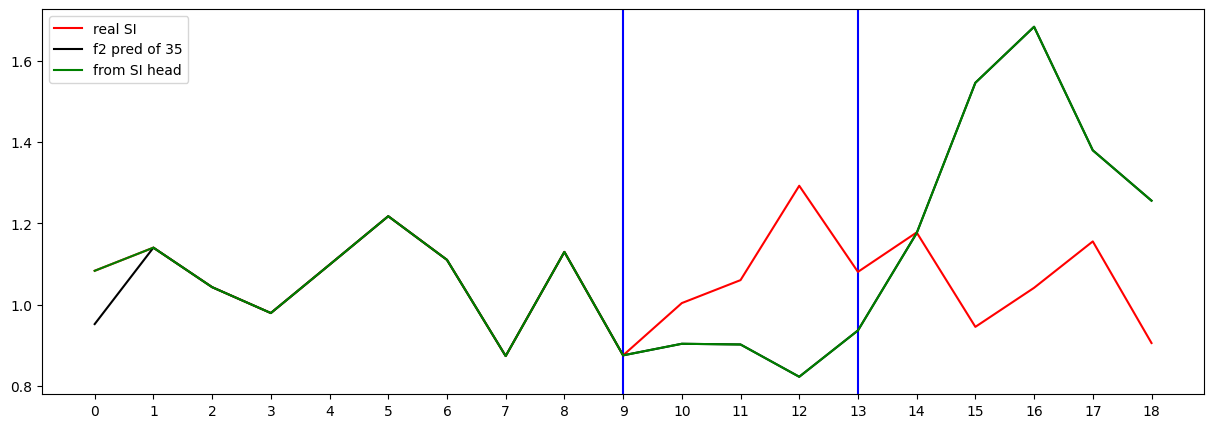

Testing R**2 - (all) - (no inputs):  0.9828624649022752
Testing R**2 - (f2) - SI full (no inputs):  -9.314154466670388
Testing R**2 - SI head only (no inputs):  -9.314154466670388
0 ...index R**2 (no inputs):  -0.7383837795361421
1 ...index R**2 (no inputs):  -2.3153974783662785
2 ...index R**2 (no inputs):  -9.314154466670388
3 ...index R**2 (no inputs):  -5.261449895248389
4 ...index R**2 (no inputs):  -122.9729475311258
5 ...index R**2 (no inputs):  -1.9094666851597615
6 ...index R**2 (no inputs):  -39.38646024303471
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -5.405129317429439
10 ...index R**2 (no inputs):  -2.3847381350086834
11 ...index R**2 (no inputs):  -4.594484702229272
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.88123182264147
16 ...index R**2 (no inputs):  -0.8571180967661818
17 ...index R**2 (no inputs):  -2.941879752764362
1

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.239747
Loss_SI: 1.3317512273788452 Loss_all: 1.2957789897918701
===
[50] Train Loss: 0.487590
Loss_SI: 0.7142956852912903 Loss_all: 0.5507882833480835
===


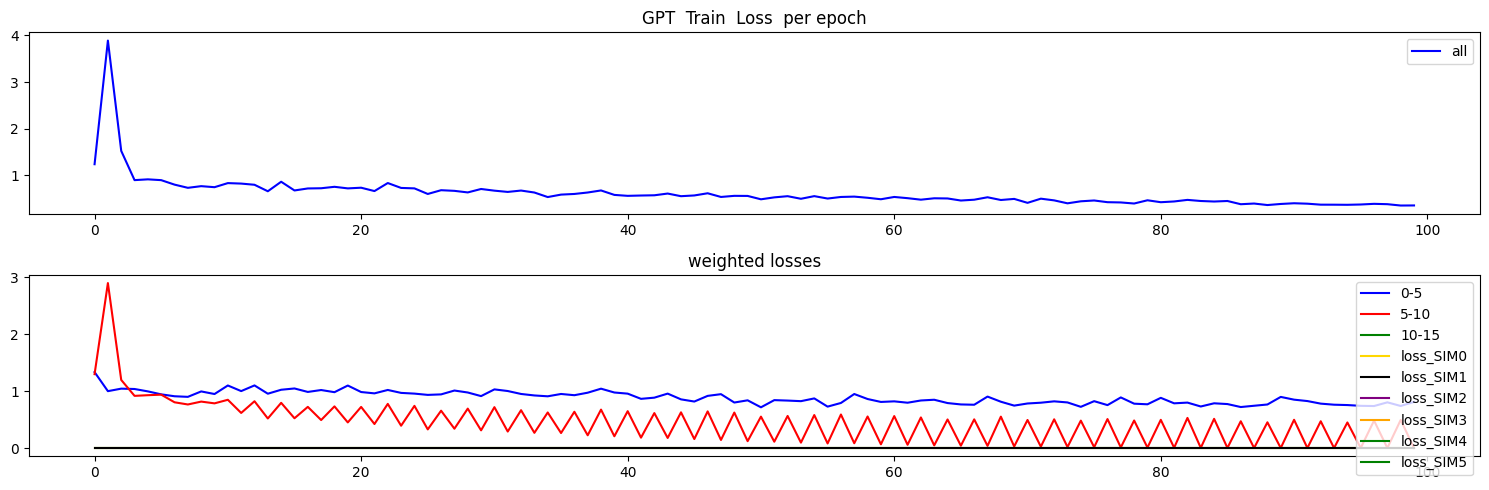

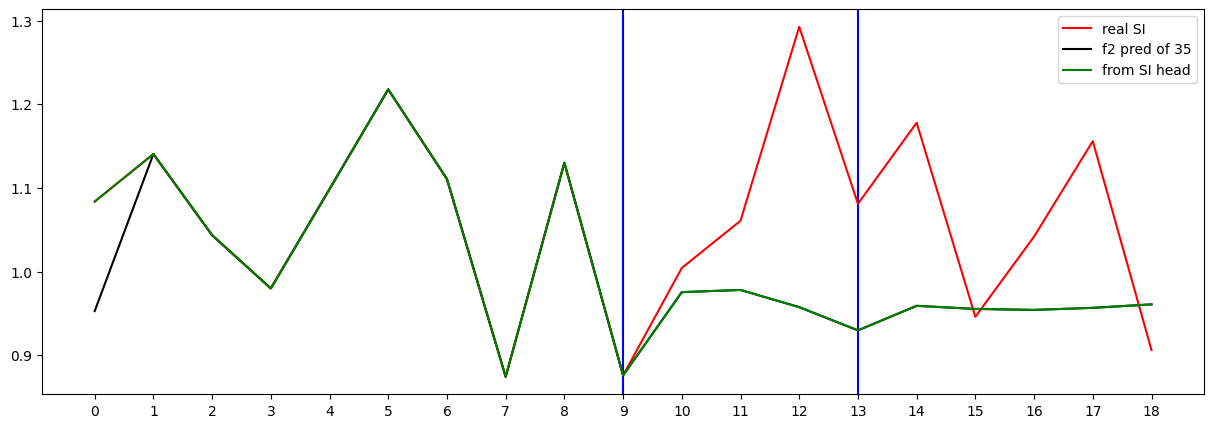

Testing R**2 - (all) - (no inputs):  0.9854358483595271
Testing R**2 - (f2) - SI full (no inputs):  -1.2543952143465584
Testing R**2 - SI head only (no inputs):  -1.2543952143465584
0 ...index R**2 (no inputs):  0.02513237425127124
1 ...index R**2 (no inputs):  -0.8523727622264907
2 ...index R**2 (no inputs):  -1.2543952143465584
3 ...index R**2 (no inputs):  -0.06734371108150894
4 ...index R**2 (no inputs):  -0.34207868210652403
5 ...index R**2 (no inputs):  -1.476669843456528
6 ...index R**2 (no inputs):  -1.899405920910977
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.002373298153505
10 ...index R**2 (no inputs):  -0.5035616419204929
11 ...index R**2 (no inputs):  -100.21990974575147
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2596975272923787
16 ...index R**2 (no inputs):  -0.1948438058683868
17 ...index R**2 (no inputs):  -64.3855779

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.214766
Loss_SI: 1.1451014280319214 Loss_all: 1.2628308534622192
===
[50] Train Loss: 0.445025
Loss_SI: 0.7588779330253601 Loss_all: 0.5335808396339417
===


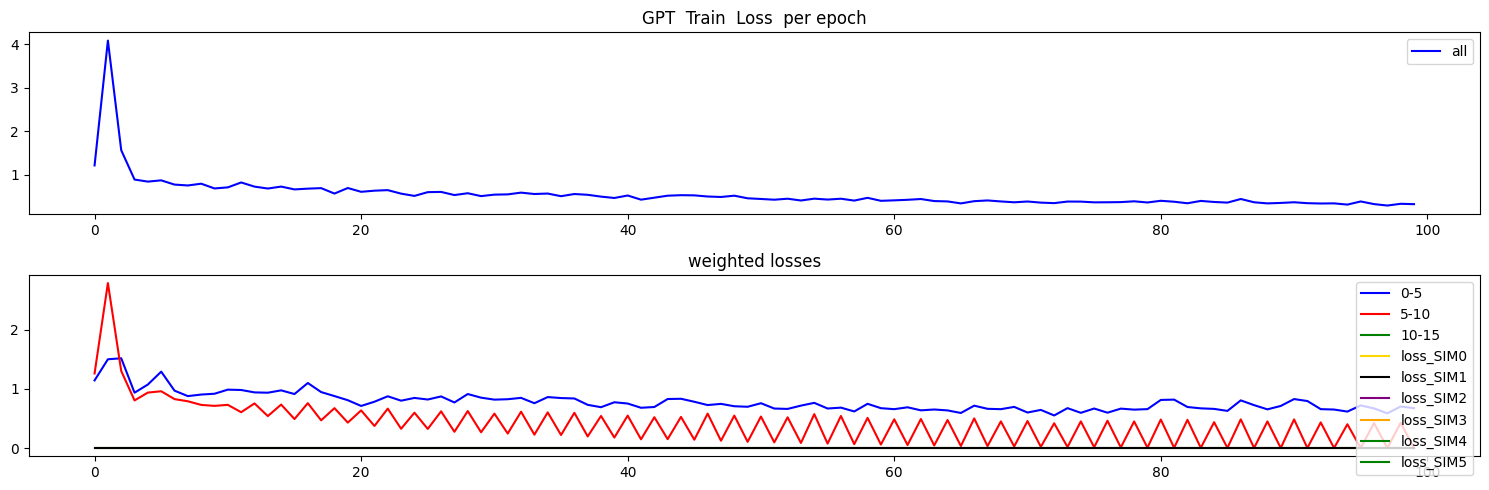

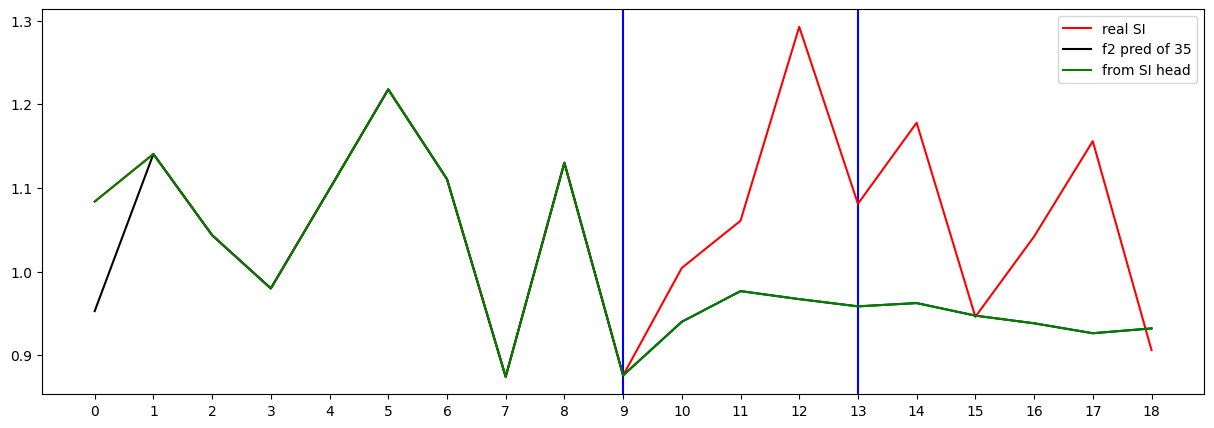

Testing R**2 - (all) - (no inputs):  0.9929907847074507
Testing R**2 - (f2) - SI full (no inputs):  -1.312902433341205
Testing R**2 - SI head only (no inputs):  -1.312902433341205
0 ...index R**2 (no inputs):  -0.019557786987855375
1 ...index R**2 (no inputs):  -0.23997534955492483
2 ...index R**2 (no inputs):  -1.312902433341205
3 ...index R**2 (no inputs):  -0.24072976854935657
4 ...index R**2 (no inputs):  -1.4583089858288965
5 ...index R**2 (no inputs):  -0.19127461564830162
6 ...index R**2 (no inputs):  -1.2268408123395718
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.7481149038274904
10 ...index R**2 (no inputs):  -0.35363290016622684
11 ...index R**2 (no inputs):  -208.86344507133134
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.33874279608964586
16 ...index R**2 (no inputs):  -0.2233558203538637
17 ...index R**2 (no inputs):  -37.80

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.289204
Loss_SI: 1.4613138437271118 Loss_all: 1.2043709754943848
===
[50] Train Loss: 0.347226
Loss_SI: 0.8485254645347595 Loss_all: 0.585843026638031
===


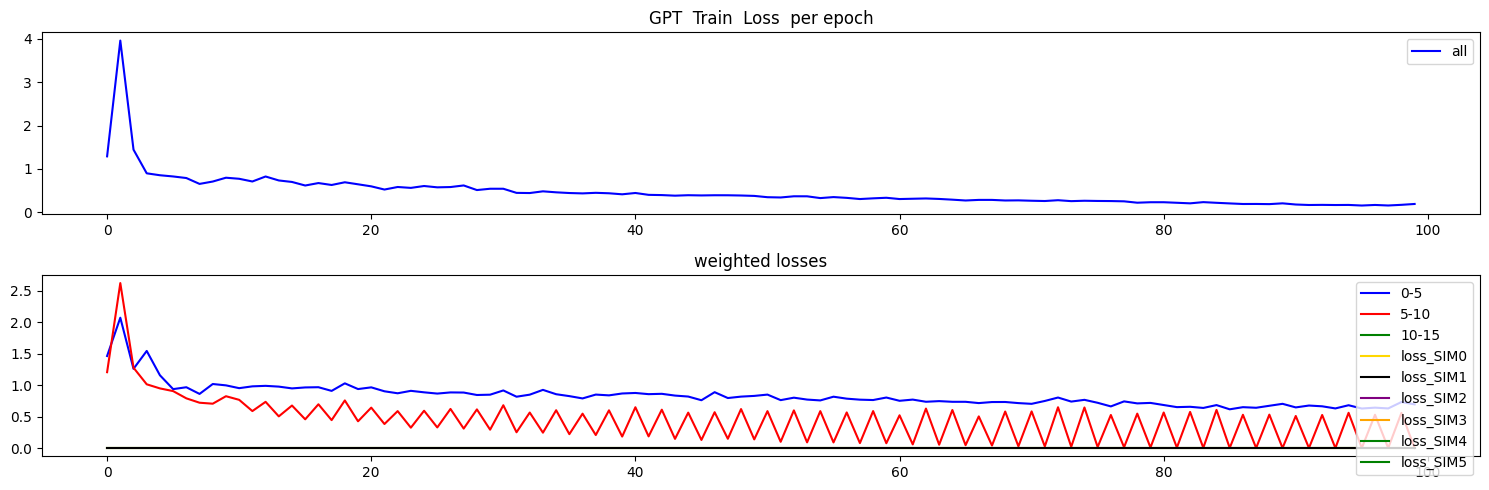

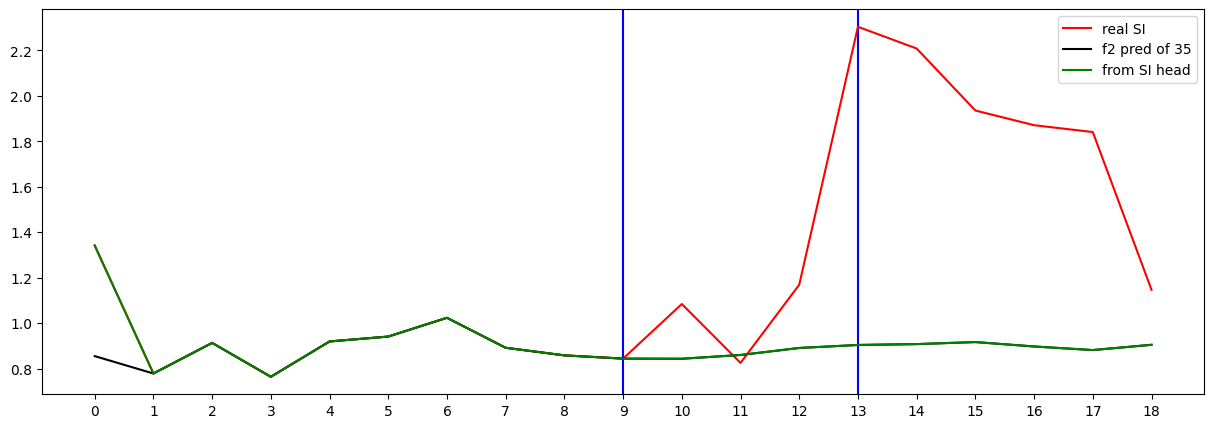

Testing R**2 - (all) - (no inputs):  0.2201626485100624
Testing R**2 - (f2) - SI full (no inputs):  -2.198248803556712
Testing R**2 - SI head only (no inputs):  -2.198248803556712
0 ...index R**2 (no inputs):  0.02536816288922006
1 ...index R**2 (no inputs):  -3.4742321745439613
2 ...index R**2 (no inputs):  -2.198248803556712
3 ...index R**2 (no inputs):  -1.3846897257552602
4 ...index R**2 (no inputs):  -1.8190929334296357
5 ...index R**2 (no inputs):  -1.584723115985934
6 ...index R**2 (no inputs):  -2.017990069981462
7 ...index R**2 (no inputs):  -0.13208371076056968
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0857881817870716
10 ...index R**2 (no inputs):  -0.8305560392111138
11 ...index R**2 (no inputs):  -2.527161445706073
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.0035461203140703113
16 ...index R**2 (no inputs):  -1.0555703912100105
17 ...index R**2 (no inputs)

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.288920
Loss_SI: 1.3156325817108154 Loss_all: 1.23735773563385
===
[50] Train Loss: 0.479398
Loss_SI: 0.8022972345352173 Loss_all: 0.5293297171592712
===


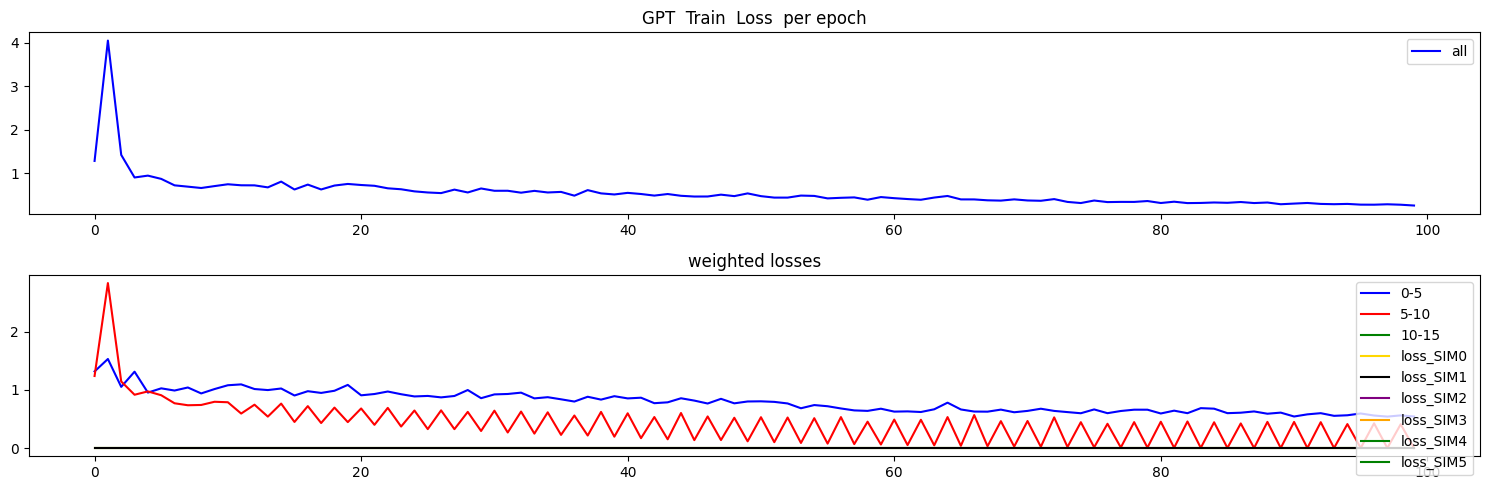

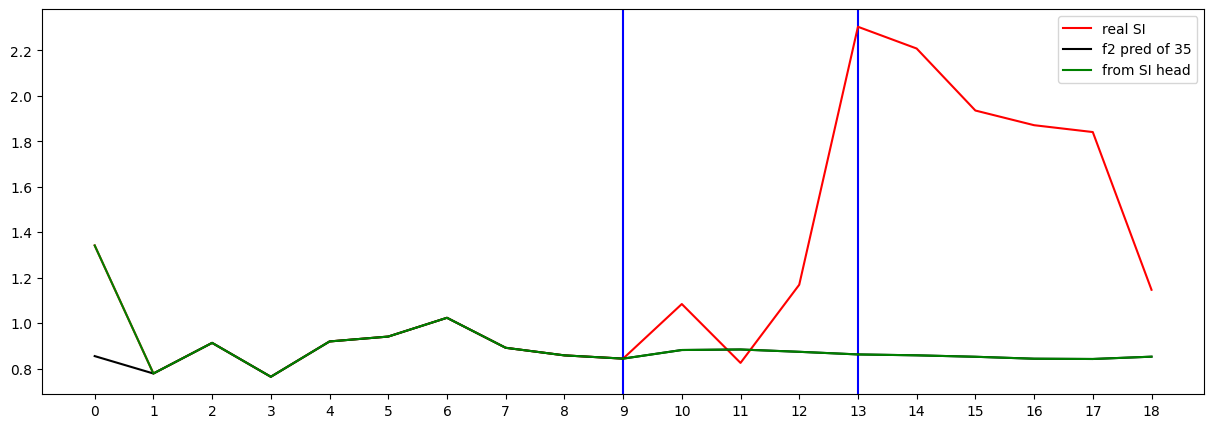

Testing R**2 - (all) - (no inputs):  0.14047081503123982
Testing R**2 - (f2) - SI full (no inputs):  -2.454412815836905
Testing R**2 - SI head only (no inputs):  -2.454412815836905
0 ...index R**2 (no inputs):  -0.047840534499270504
1 ...index R**2 (no inputs):  -2.22942839205081
2 ...index R**2 (no inputs):  -2.454412815836905
3 ...index R**2 (no inputs):  -1.8238066244880158
4 ...index R**2 (no inputs):  -1.8610446724539127
5 ...index R**2 (no inputs):  -1.8494437019992973
6 ...index R**2 (no inputs):  -1.2224942752633998
7 ...index R**2 (no inputs):  -0.03370980172557103
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2272346327433934
10 ...index R**2 (no inputs):  -0.8405272696629513
11 ...index R**2 (no inputs):  -6.743104728033767
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.038487266066540404
16 ...index R**2 (no inputs):  -0.4900405093321709
17 ...index R**2 (no input

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.279931
Loss_SI: 1.1828861236572266 Loss_all: 1.203277349472046
===
[50] Train Loss: 0.536584
Loss_SI: 0.8536327481269836 Loss_all: 0.5644552111625671
===


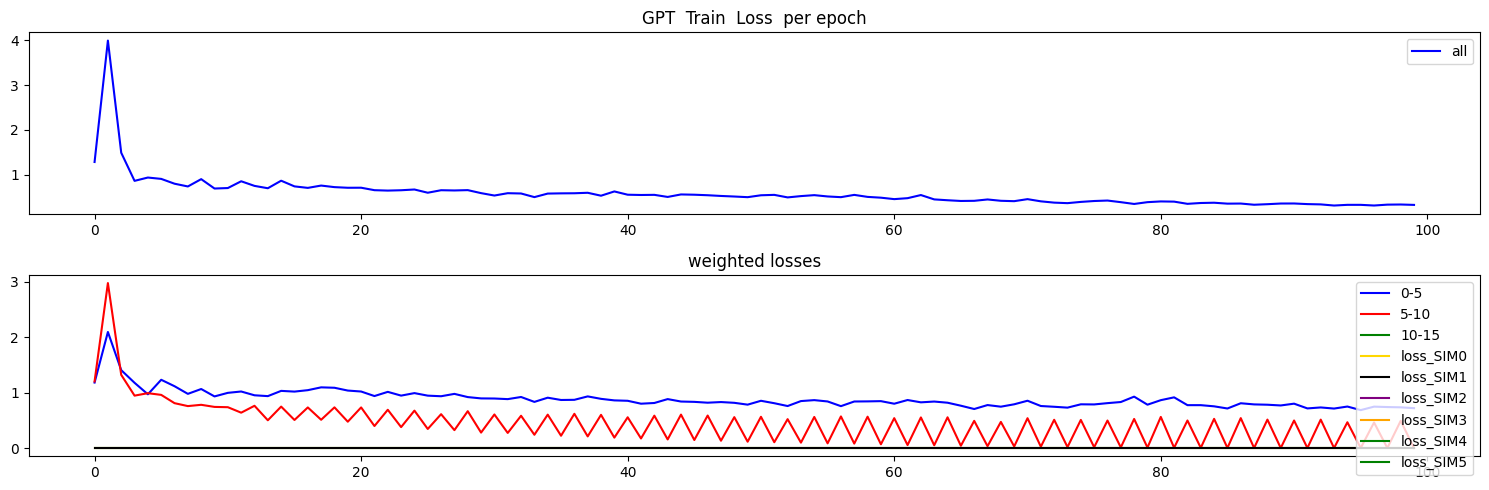

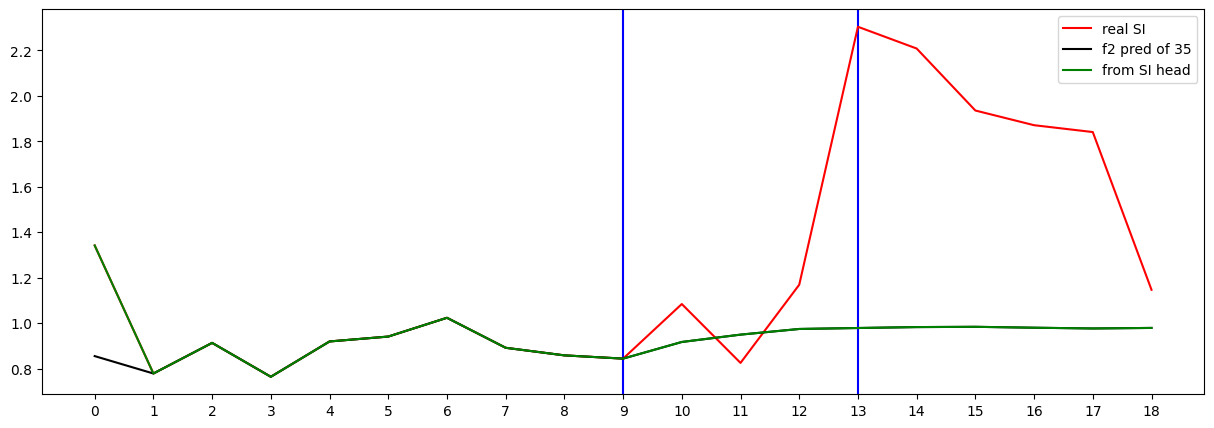

Testing R**2 - (all) - (no inputs):  0.2720326390147635
Testing R**2 - (f2) - SI full (no inputs):  -1.7451336645678568
Testing R**2 - SI head only (no inputs):  -1.7451336645678568
0 ...index R**2 (no inputs):  -0.005159902439961339
1 ...index R**2 (no inputs):  -1.262703737401473
2 ...index R**2 (no inputs):  -1.7451336645678568
3 ...index R**2 (no inputs):  -1.8919693924200414
4 ...index R**2 (no inputs):  -1.9513168920794324
5 ...index R**2 (no inputs):  -1.4127823887086546
6 ...index R**2 (no inputs):  -2.1386493527319934
7 ...index R**2 (no inputs):  -0.06409577807896771
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6178091927552796
10 ...index R**2 (no inputs):  -0.8481869926412795
11 ...index R**2 (no inputs):  -13.969174321718553
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6559087162509594
16 ...index R**2 (no inputs):  -0.19379981726436601
17 ...index R**2 (no i

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.186066
Loss_SI: 1.5115164518356323 Loss_all: 1.2289149761199951
===
[50] Train Loss: 0.480444
Loss_SI: 0.8482214212417603 Loss_all: 0.5459664463996887
===


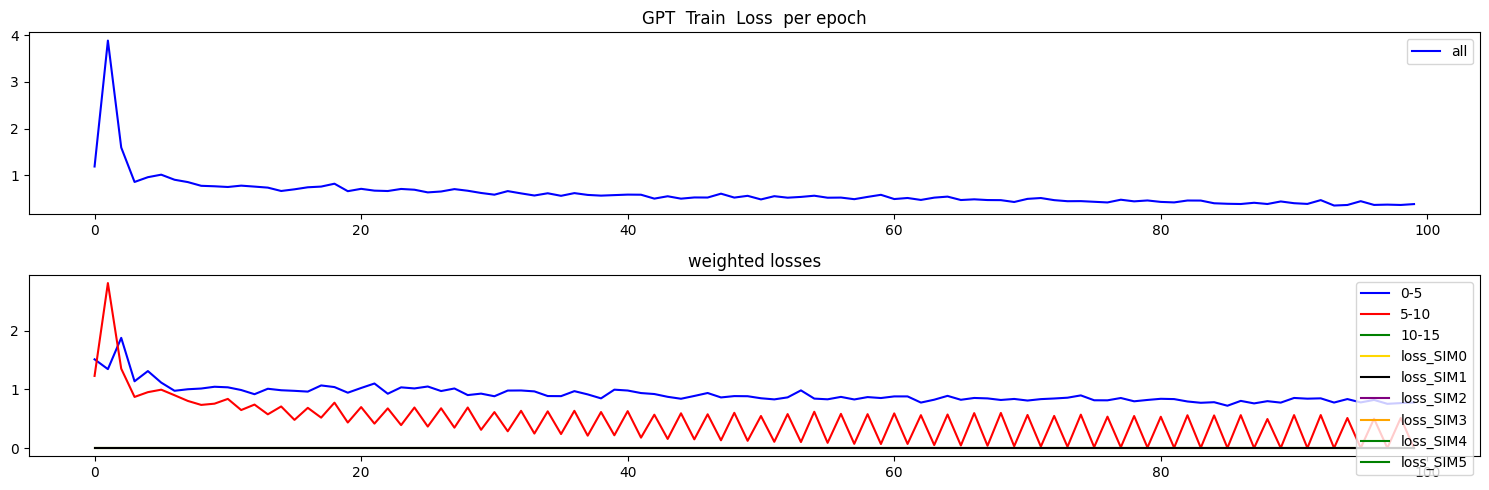

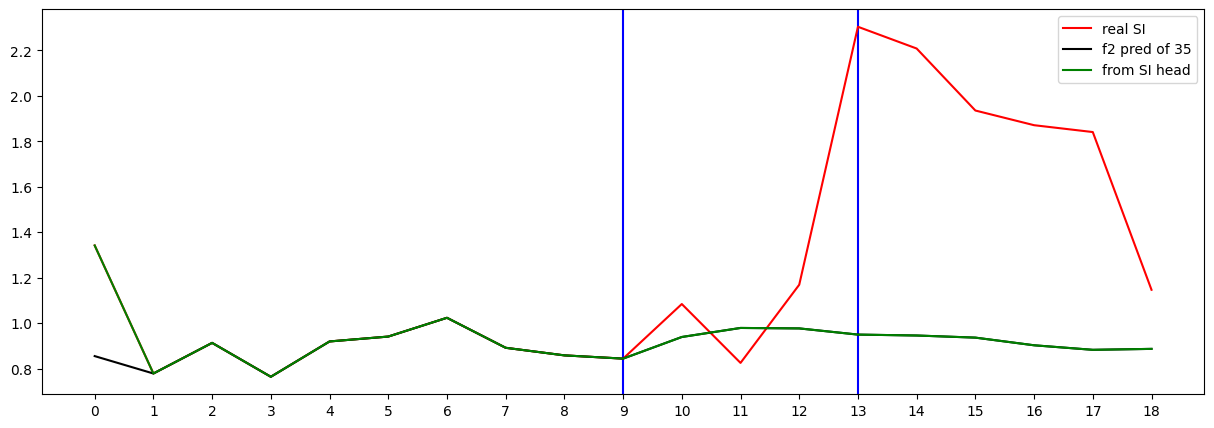

Testing R**2 - (all) - (no inputs):  0.4073673889493581
Testing R**2 - (f2) - SI full (no inputs):  -1.9635128729586304
Testing R**2 - SI head only (no inputs):  -1.9635128729586304
0 ...index R**2 (no inputs):  -0.0410984527581264
1 ...index R**2 (no inputs):  -1.2797164985024745
2 ...index R**2 (no inputs):  -1.9635128729586304
3 ...index R**2 (no inputs):  -1.281138551791333
4 ...index R**2 (no inputs):  -1.819648318607141
5 ...index R**2 (no inputs):  -0.9637033759332121
6 ...index R**2 (no inputs):  -1.7289527838853291
7 ...index R**2 (no inputs):  -0.5019420466744733
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3953782931425829
10 ...index R**2 (no inputs):  -0.4806686404246898
11 ...index R**2 (no inputs):  -0.37506080392292307
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.06671300878289
16 ...index R**2 (no inputs):  -0.4446433742485003
17 ...index R**2 (no inputs)

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.215326
Loss_SI: 1.1095837354660034 Loss_all: 1.148818850517273
===
[50] Train Loss: 0.426571
Loss_SI: 0.737335205078125 Loss_all: 0.47413355112075806
===


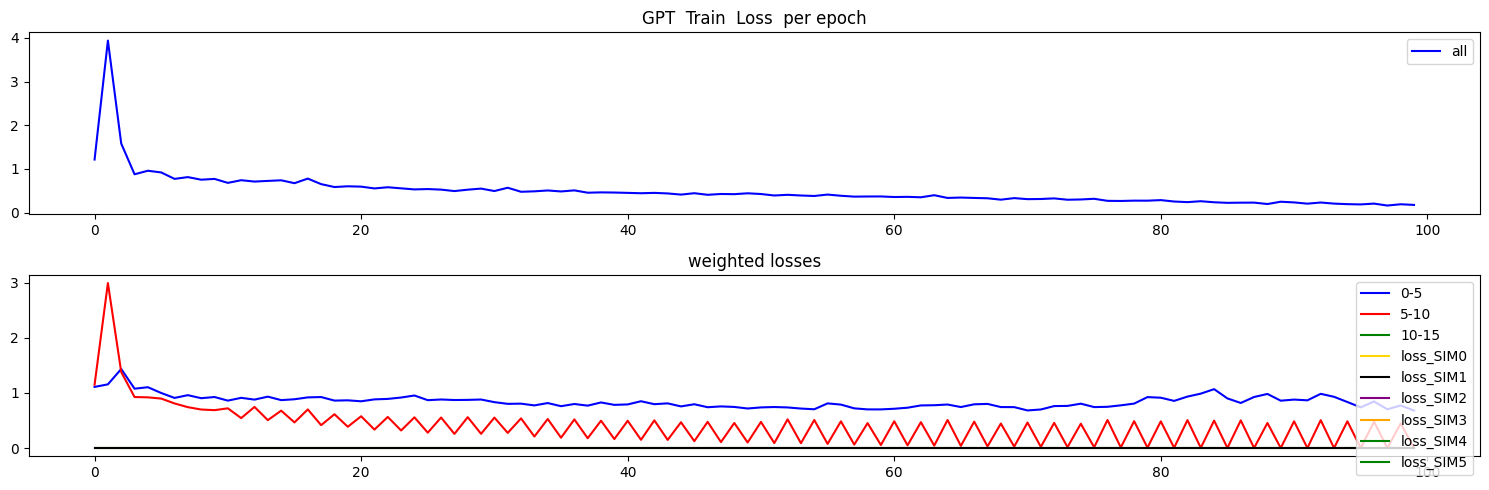

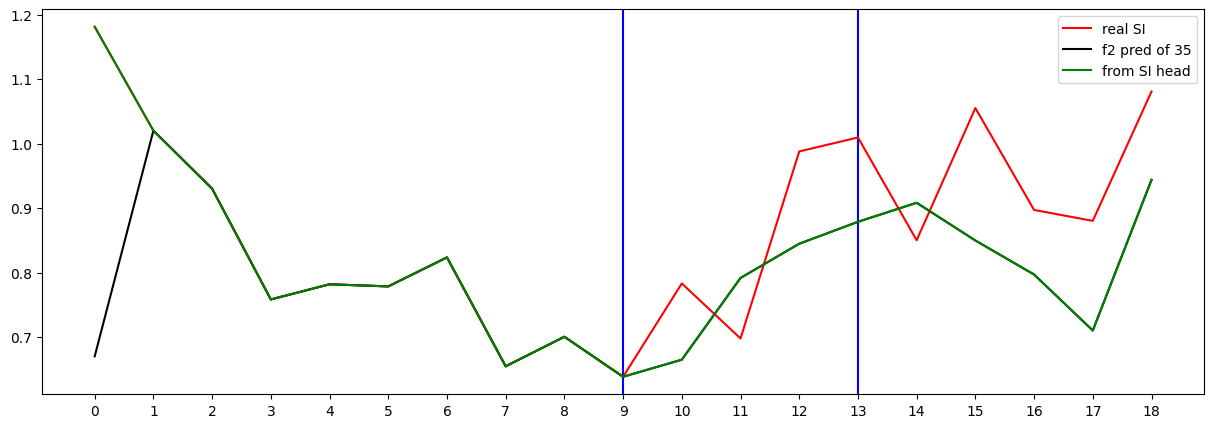

Testing R**2 - (all) - (no inputs):  0.9922064054021623
Testing R**2 - (f2) - SI full (no inputs):  -0.7494055053523063
Testing R**2 - SI head only (no inputs):  -0.7494055053523063
0 ...index R**2 (no inputs):  0.026733550380213633
1 ...index R**2 (no inputs):  -0.2404281389040055
2 ...index R**2 (no inputs):  -0.7494055053523063
3 ...index R**2 (no inputs):  -65.44718842697452
4 ...index R**2 (no inputs):  0.07867058573212238
5 ...index R**2 (no inputs):  -1.4858475395053348
6 ...index R**2 (no inputs):  -25.6562441280237
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0720695242713848
10 ...index R**2 (no inputs):  -0.3612127267677365
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.7769688687845555
16 ...index R**2 (no inputs):  -10.269366063658563
17 ...index R**2 (no inputs):  -99.91823327976194
18 ...inde

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.252333
Loss_SI: 1.3204706907272339 Loss_all: 1.2525722980499268
===
[50] Train Loss: 0.516908
Loss_SI: 0.9152259826660156 Loss_all: 0.5564365983009338
===


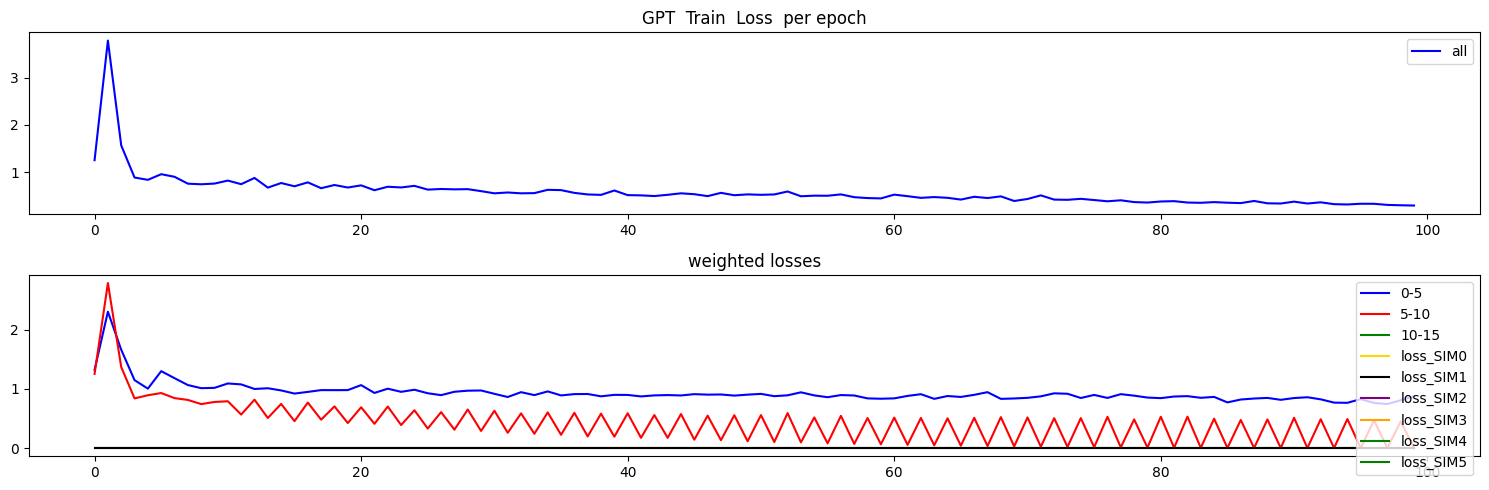

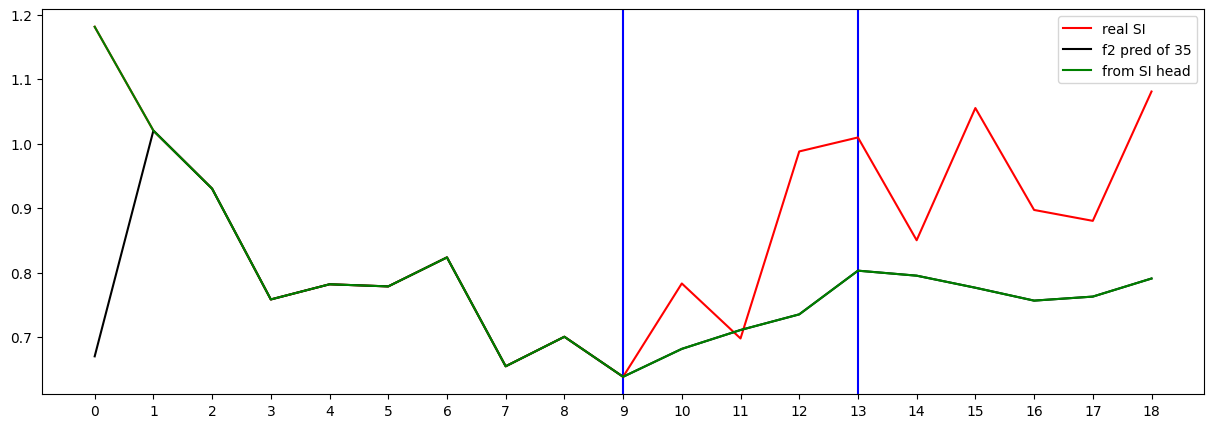

Testing R**2 - (all) - (no inputs):  0.9877961473707221
Testing R**2 - (f2) - SI full (no inputs):  -2.0278276885513793
Testing R**2 - SI head only (no inputs):  -2.0278276885513793
0 ...index R**2 (no inputs):  -0.07854126985849708
1 ...index R**2 (no inputs):  -1.741309185196803
2 ...index R**2 (no inputs):  -2.0278276885513793
3 ...index R**2 (no inputs):  -395.42606745106974
4 ...index R**2 (no inputs):  0.1475404734600666
5 ...index R**2 (no inputs):  -2.9238347269333973
6 ...index R**2 (no inputs):  -4.129786276367635
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8925960156259825
10 ...index R**2 (no inputs):  -0.7736857141304108
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6420888399721347
16 ...index R**2 (no inputs):  -5.204414910846397
17 ...index R**2 (no inputs):  -43.48291794456047
18 ...inde

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.280727
Loss_SI: 1.3036155700683594 Loss_all: 1.2455909252166748
===
[50] Train Loss: 0.455244
Loss_SI: 0.6963390707969666 Loss_all: 0.5147191286087036
===


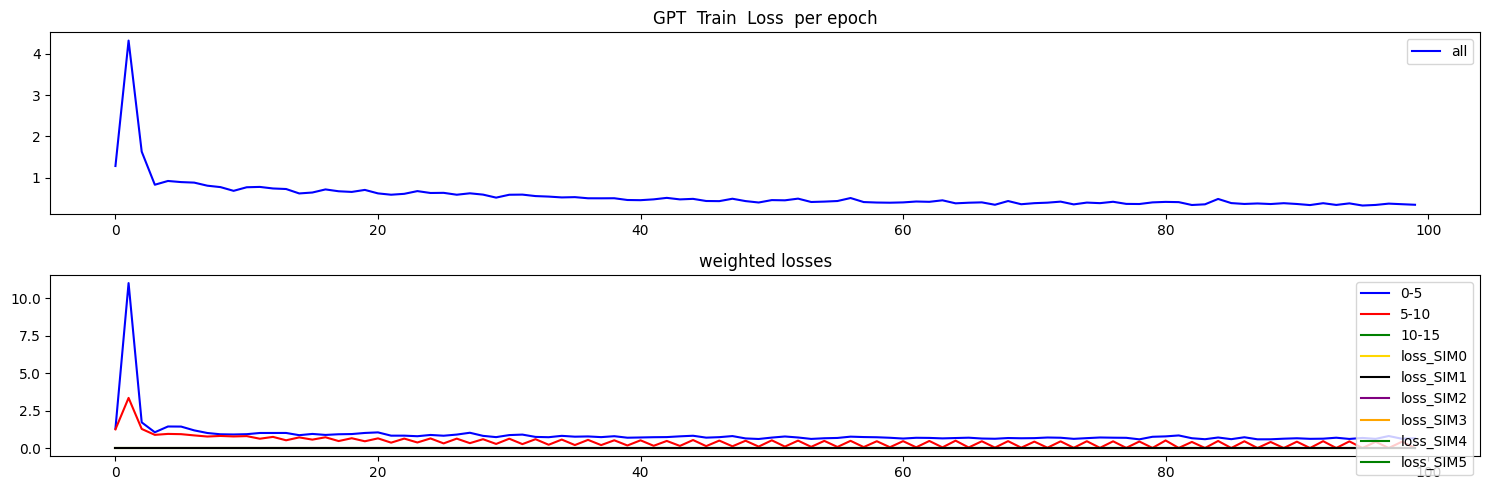

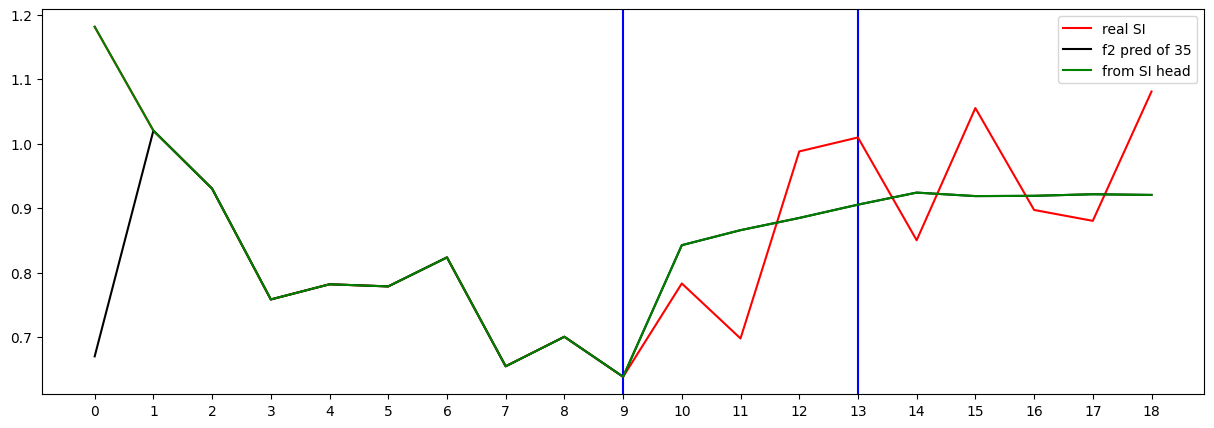

Testing R**2 - (all) - (no inputs):  0.9942991546206398
Testing R**2 - (f2) - SI full (no inputs):  -0.0004883862428164409
Testing R**2 - SI head only (no inputs):  -0.0004883862428164409
0 ...index R**2 (no inputs):  -0.3258432045465314
1 ...index R**2 (no inputs):  -0.2508568438019225
2 ...index R**2 (no inputs):  -0.0004883862428164409
3 ...index R**2 (no inputs):  -106.48325326598037
4 ...index R**2 (no inputs):  -1.3043617667403598
5 ...index R**2 (no inputs):  -0.8324047657077074
6 ...index R**2 (no inputs):  0.3075802702699221
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.03099528389992734
10 ...index R**2 (no inputs):  -0.35996498956798817
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.147321902038429
16 ...index R**2 (no inputs):  -0.7050688249062287
17 ...index R**2 (no inputs):  -73.93368338454543


In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.321907
Loss_SI: 1.2467888593673706 Loss_all: 1.3102580308914185
===
[50] Train Loss: 0.486648
Loss_SI: 0.7324345111846924 Loss_all: 0.5451503396034241
===


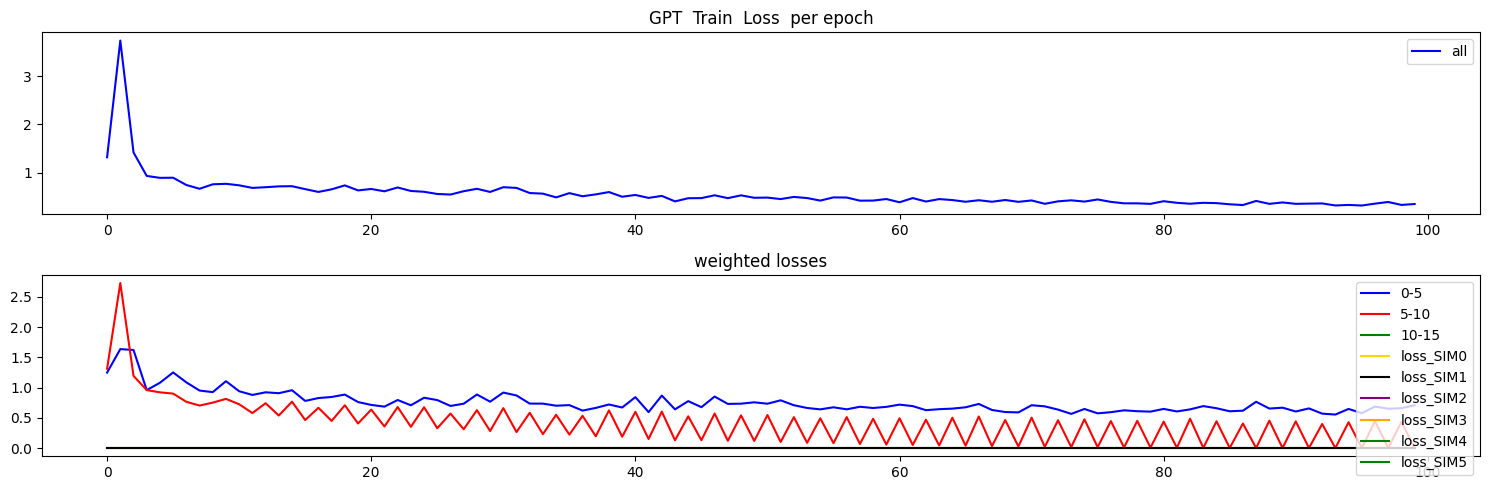

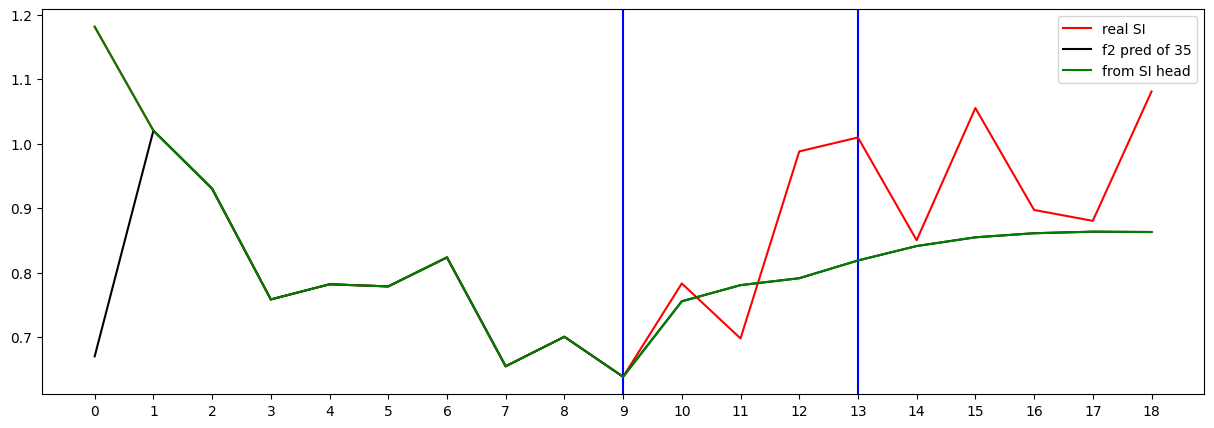

Testing R**2 - (all) - (no inputs):  0.9946101748076938
Testing R**2 - (f2) - SI full (no inputs):  -0.7460659199200907
Testing R**2 - SI head only (no inputs):  -0.7460659199200907
0 ...index R**2 (no inputs):  -0.13175353188476113
1 ...index R**2 (no inputs):  -0.26089248976138
2 ...index R**2 (no inputs):  -0.7460659199200907
3 ...index R**2 (no inputs):  -120.1762960168948
4 ...index R**2 (no inputs):  -0.46781317315124715
5 ...index R**2 (no inputs):  -0.7184737324610528
6 ...index R**2 (no inputs):  -2.116099864520294
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.03637676348045571
10 ...index R**2 (no inputs):  -0.0862729230389947
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.2963260237860029
16 ...index R**2 (no inputs):  -1.017333645203704
17 ...index R**2 (no inputs):  -494.54969887880253
18 ...inde

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.8737095309131713


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.7207262561534993


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.35757363903334016


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.4332620065717341



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.8053471477600431
Naive_R2:....................................R²: 0.9040
RMSE:0.0749,MAE:0.0632,MASE:0.2668
1 .......................R² on just step n - R²: 0.8053471477600431
Naive_R2:....................................R²: 0.9040
RMSE:0.0749,MAE:0.0632,MASE:0.2668
2 .....................R² on first n steps - R²: -0.12079617145169053
Naive_R2:....................................R²: 0.5216
RMSE:0.1896,MAE:0.1572,MASE:0.6226
2 .......................R² on just step n - R²: -2.8228182681898883
Naive_R2:....................................R²: -1.9298
RMSE:0.2575,MAE:0.2512,MASE:1.5971
3 .....................R² on first n steps - R²: -0.34993933920107834
Naive_R2:....................................R²: 0.3867
RMSE:0.3904,MAE:0.2449,MASE:0.7610
3 .......................R² on just step n - R²: -0.6130784117751173
Naive_R2:....................................R²: 0.2789
RMSE:0.6208,MAE:0.4202,MASE:0.7401
4 .....................R² on first n st

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.3939284937280987
Naive_R2:....................................R²: 0.7012
RMSE:0.1322,MAE:0.1107,MASE:0.4674
1 .......................R² on just step n - R²: 0.3939284937280987
Naive_R2:....................................R²: 0.7012
RMSE:0.1322,MAE:0.1107,MASE:0.4674
2 .....................R² on first n steps - R²: -0.26849006247277285
Naive_R2:....................................R²: 0.4586
RMSE:0.2017,MAE:0.1644,MASE:0.6510
2 .......................R² on just step n - R²: -2.6849302754242217
Naive_R2:....................................R²: -1.8241
RMSE:0.2528,MAE:0.2181,MASE:1.3863
3 .....................R² on first n steps - R²: -0.34589963228777054
Naive_R2:....................................R²: 0.3886
RMSE:0.3898,MAE:0.2408,MASE:0.7482
3 .......................R² on just step n - R²: -0.567674545064919
Naive_R2:....................................R²: 0.2992
RMSE:0.6120,MAE:0.3935,MASE:0.6931
4 .....................R² on first n ste

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.2927037758470383
Naive_R2:....................................R²: 0.6513
RMSE:0.1428,MAE:0.1373,MASE:0.5797
1 .......................R² on just step n - R²: 0.2927037758470383
Naive_R2:....................................R²: 0.6513
RMSE:0.1428,MAE:0.1373,MASE:0.5797
2 .....................R² on first n steps - R²: -0.15405397163986856
Naive_R2:....................................R²: 0.5075
RMSE:0.1924,MAE:0.1686,MASE:0.6678
2 .......................R² on just step n - R²: -2.093188109378016
Naive_R2:....................................R²: -1.3706
RMSE:0.2316,MAE:0.2000,MASE:1.2714
3 .....................R² on first n steps - R²: -0.17830938206418923
Naive_R2:....................................R²: 0.4647
RMSE:0.3648,MAE:0.2365,MASE:0.7351
3 .......................R² on just step n - R²: -0.36077938649214314
Naive_R2:....................................R²: 0.3916
RMSE:0.5702,MAE:0.3723,MASE:0.6557
4 .....................R² on first n st

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.39649774367015544
Naive_R2:....................................R²: 0.7025
RMSE:0.1320,MAE:0.1256,MASE:0.5302
1 .......................R² on just step n - R²: 0.39649774367015544
Naive_R2:....................................R²: 0.7025
RMSE:0.1320,MAE:0.1256,MASE:0.5302
2 .....................R² on first n steps - R²: -0.22949682129098825
Naive_R2:....................................R²: 0.4753
RMSE:0.1986,MAE:0.1749,MASE:0.6924
2 .......................R² on just step n - R²: -2.5449413457997427
Naive_R2:....................................R²: -1.7168
RMSE:0.2480,MAE:0.2241,MASE:1.4249
3 .....................R² on first n steps - R²: -0.22726380364205467
Naive_R2:....................................R²: 0.4424
RMSE:0.3723,MAE:0.2500,MASE:0.7770
3 .......................R² on just step n - R²: -0.4099283453458682
Naive_R2:....................................R²: 0.3697
RMSE:0.5804,MAE:0.4003,MASE:0.7050
4 .....................R² on first n 


## Plot


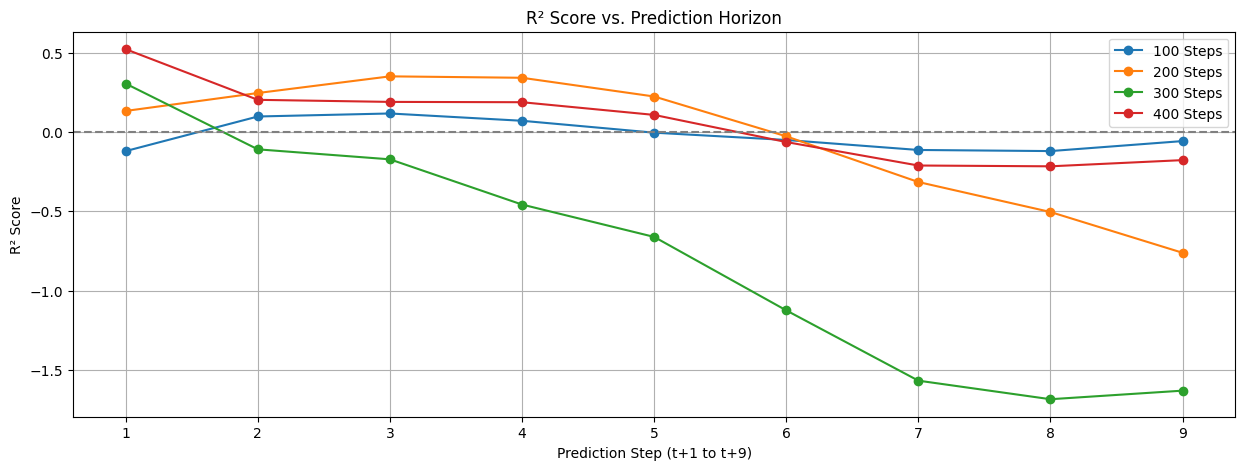

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
